# Lab 3 : Regression Analysis

In this lab, we will learn basic regression analysis and conduct regression diagnostics.

In `Lab0`, we have already run the regression analysis for the `marriage` dataset. We will review it first and then do more regression analysis.

In [1]:
library(pacman)
p_load(data.table, magrittr, ggplot2, knitr, psych, stargazer, MASS,
        ISLR, wooldridge, performance, see, patchwork)

In [2]:
# let's read the dataset
mdt <- fread("../data/marriage_data.csv")

In [3]:
head(mdt)

id,name,age,income,openness,conscientiousness,extraversion,agreeableness,neuroticism,tolerance,matched_id,happiness
<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
11064,zczczy,28,207.03,32.67,53.08,42.21,45.01,22.63,38.32,37741,52.81
71744,psbrqc,45,3039.66,37.80,65.26,55.34,70.52,35.35,46.76,93175,73.96
2923,aftchs,21,7384.21,40.51,55.45,51.17,21.11,62.40,26.95,21289,67.69
99072,yqixuc,30,447.91,46.97,49.60,46.38,32.44,46.33,32.08,54307,50.80
71402,nznyji,17,1862.44,44.17,37.12,34.04,53.01,46.85,30.11,78385,67.96
39880,snnkvl,34,23982.03,51.20,51.57,47.39,49.45,60.25,30.93,NA,126.60


In [4]:
# add a new column to the data table
mdt %>%
    .[, is_married := ifelse(is.na(matched_id), 'No', 'Yes')] %>%
    head()

id,name,age,income,openness,conscientiousness,extraversion,agreeableness,neuroticism,tolerance,matched_id,happiness,is_married
<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
11064,zczczy,28,207.03,32.67,53.08,42.21,45.01,22.63,38.32,37741,52.81,Yes
71744,psbrqc,45,3039.66,37.80,65.26,55.34,70.52,35.35,46.76,93175,73.96,Yes
2923,aftchs,21,7384.21,40.51,55.45,51.17,21.11,62.40,26.95,21289,67.69,Yes
99072,yqixuc,30,447.91,46.97,49.60,46.38,32.44,46.33,32.08,54307,50.80,Yes
71402,nznyji,17,1862.44,44.17,37.12,34.04,53.01,46.85,30.11,78385,67.96,Yes
39880,snnkvl,34,23982.03,51.20,51.57,47.39,49.45,60.25,30.93,NA,126.60,No


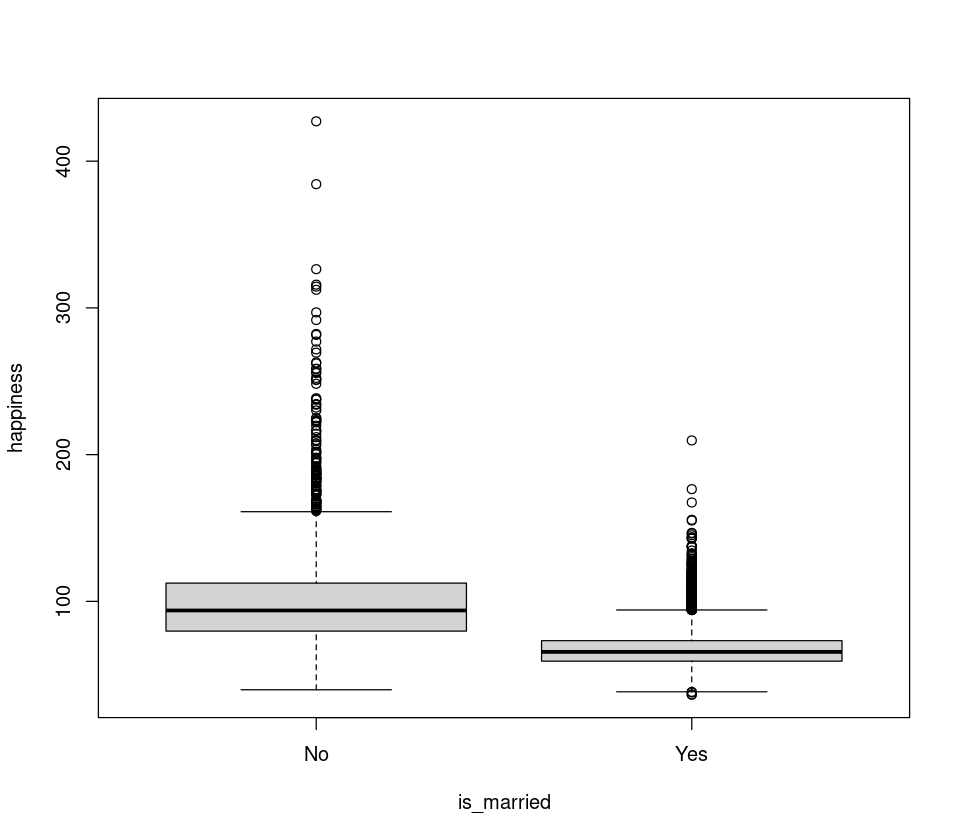

In [5]:
options(repr.plot.width = 8, repr.plot.height = 7)
mdt %>%
    with(boxplot(happiness ~ is_married))

In [6]:
# let's run the t-test
# t.test is a function in R to run t-test
mdt %>%
    .[!is.na(happiness)] %>%
    with(t.test(happiness ~ is_married))


	Welch Two Sample t-test

data:  happiness by is_married
t = 46.77, df = 2464.7, p-value < 2.2e-16
alternative hypothesis: true difference in means between group No and group Yes is not equal to 0
95 percent confidence interval:
 32.33701 35.16724
sample estimates:
 mean in group No mean in group Yes 
        100.87748          67.12535 


From the above results, we can see that married people are less happy
than single people. However, this does not mean that marriage makes
people unhappy. There are several reasons why married people are less
happy than single people:

- **Selection Bias**: People who are married may have different
  characteristics than people who are single. For example, married
  people may be older than single people, and older people may be less
  happy than younger people. When we generate the population, we
  did not use marriage as a factor to generate the happiness score.
- **Reverse Causality**: People who are less happy may be less likely
  to get married. For example, people who are less happy may be less
  likely to get married because they are less likely to find a
  partner. When we generate the population, we did not use the
  happiness score as a factor to generate marriage.
- **Omitted Variable Bias**: There may be other factors that affect
  both marriage and happiness. For example, people who are more
  open and agreeable may be more likely to get married and may be happier.

This is the formulat we used to generate the happiness score:

$$
\text{Happiness} = 0.03 \times \text{Income} + 0.4 \times \text{Openness} + 0.32 \times \text{Agreeableness} + 0.57 \times \text{Tolerance} +  0.02 \times (\text{Age} - 40)^2 
$$

> Takeaway: Correlation does not imply causation. Statistical tests
do not prove causation. When we find some statistical difference, we
need to think about the reasons behind it. Sometimes, the difference
is due to selection bias, reverse causality, or omitted variable bias.
Or it may be due to random chance.

In [7]:
lm_model1 <- lm(happiness ~ age + income + is_married, data = mdt)
summary(lm_model1)


Call:
lm(formula = happiness ~ age + income + is_married, data = mdt)

Residuals:
     Min       1Q   Median       3Q      Max 
-27.2648  -4.8584  -0.0184   4.7646  29.5264 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.031e+01  2.573e-01 234.391  < 2e-16 ***
age           -8.455e-02  3.897e-03 -21.694  < 2e-16 ***
income         2.997e-03  1.029e-05 291.233  < 2e-16 ***
is_marriedYes -5.752e-01  1.934e-01  -2.974  0.00294 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.164 on 19996 degrees of freedom
Multiple R-squared:  0.8684,	Adjusted R-squared:  0.8684 
F-statistic: 4.398e+04 on 3 and 19996 DF,  p-value: < 2.2e-16


In [8]:
stargazer(lm_model1, type = "text")


                         Dependent variable:     
                    -----------------------------
                              happiness          
-------------------------------------------------
age                           -0.085***          
                               (0.004)           
                                                 
income                        0.003***           
                              (0.00001)          
                                                 
is_marriedYes                 -0.575***          
                               (0.193)           
                                                 
Constant                      60.312***          
                               (0.257)           
                                                 
-------------------------------------------------
Observations                   20,000            
R2                              0.868            
Adjusted R2                     0.868            

In [9]:
# using qudratic term for age
lm_model2 <- lm(happiness ~ age + I(age^2) + income + is_married, data = mdt)
summary(lm_model2)


Call:
lm(formula = happiness ~ age + I(age^2) + income + is_married, 
    data = mdt)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.221  -4.387   0.003   4.343  23.392 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8.524e+01  4.446e-01 191.719   <2e-16 ***
age           -1.616e+00  2.351e-02 -68.707   <2e-16 ***
I(age^2)       2.017e-02  3.063e-04  65.859   <2e-16 ***
income         3.020e-03  9.335e-06 323.511   <2e-16 ***
is_marriedYes  1.030e-01  1.756e-01   0.586    0.558    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.494 on 19995 degrees of freedom
Multiple R-squared:  0.8919,	Adjusted R-squared:  0.8918 
F-statistic: 4.122e+04 on 4 and 19995 DF,  p-value: < 2.2e-16


In [10]:
stargazer(lm_model2, type = "text")


                         Dependent variable:     
                    -----------------------------
                              happiness          
-------------------------------------------------
age                           -1.616***          
                               (0.024)           
                                                 
I(age2)                       0.020***           
                              (0.0003)           
                                                 
income                        0.003***           
                              (0.00001)          
                                                 
is_marriedYes                   0.103            
                               (0.176)           
                                                 
Constant                      85.240***          
                               (0.445)           
                                                 
-------------------------------------------------

## Proper Introduction to Regression Analysis

__Many exam questions will be related to regression analysis__. So, please pay attention to this section.
Before we run a regression analysis, let's first understand the basic concepts of regression analysis
via simulation.

We know that the relationship between `weight` and `height` is roughly linear and positive.
We will use this relationship to simulate the data. When we simulate the data, we will add some
random nosie to the data as there is no perfect linear relationship between `weight` and `height`.
To make you understand the concept, I will simulate the data step by step.

- scenario 1: no noise (perfect linear relationship)
- scenario 2: add some noise (not perfect linear relationship)
- scenario 3: add some outliers (not perfect linear relationship)

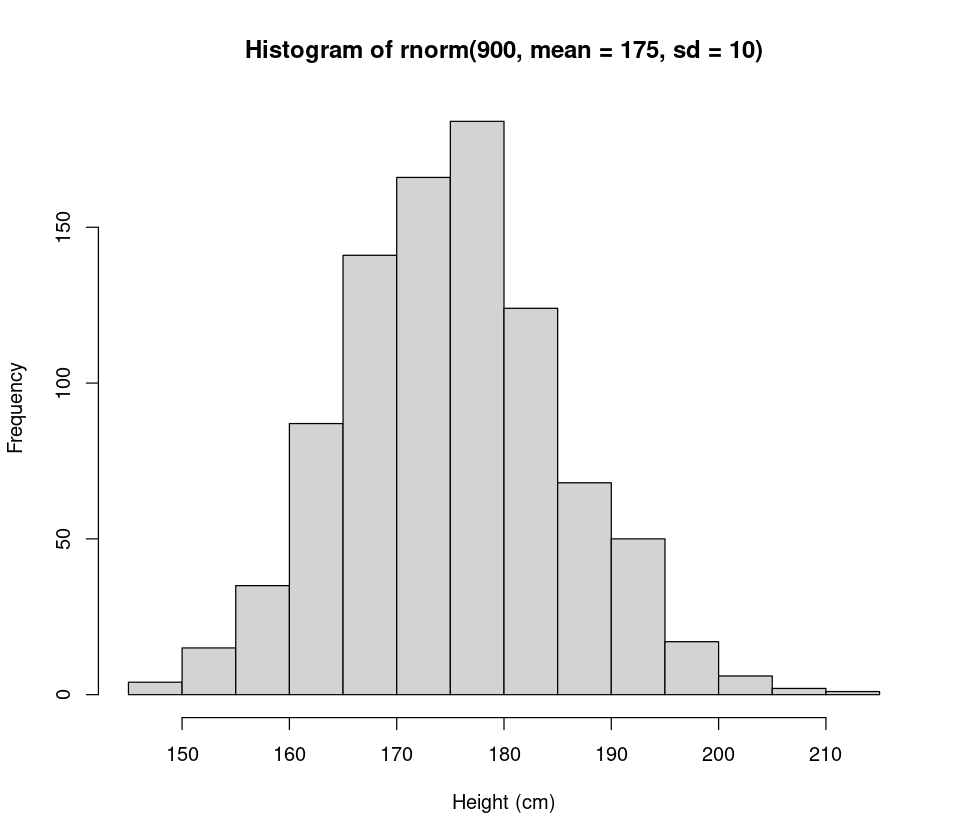

In [11]:
# rnorm = normal distribution function in R 
hist(rnorm(900, mean = 175, sd = 10), xlab="Height (cm)")

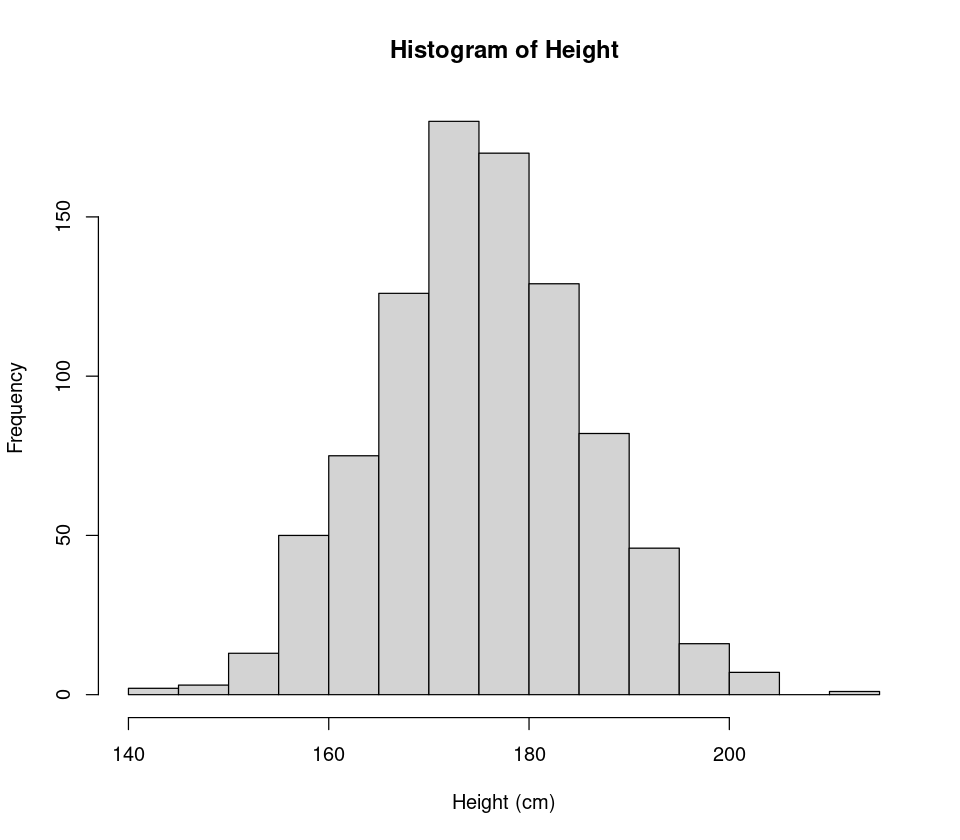

In [12]:
# simulate weight and height
# generate 900 random numbers from normal distribution
# mean =  175cm and sd = 10cm
height <- rnorm(900, mean = 175, sd = 10)
# plot histogram
hist(height, breaks = 20, xlab="Height (cm)", main="Histogram of Height")

Now, we have the height, we assume that there is a linear relationship between `height` and `weight`,
which has the following form:

$$
weight = \beta_0 + \beta_1 \times height
$$

Here we set $\beta_0 = 55$ and $\beta_1 = 0.1$. This means that if the height increases by 1 cm, the weight will increase by 0.1 kg.

$$
weight = 55 + 0.1 \times height
$$

It has the format:

$$
y = b + ax
$$

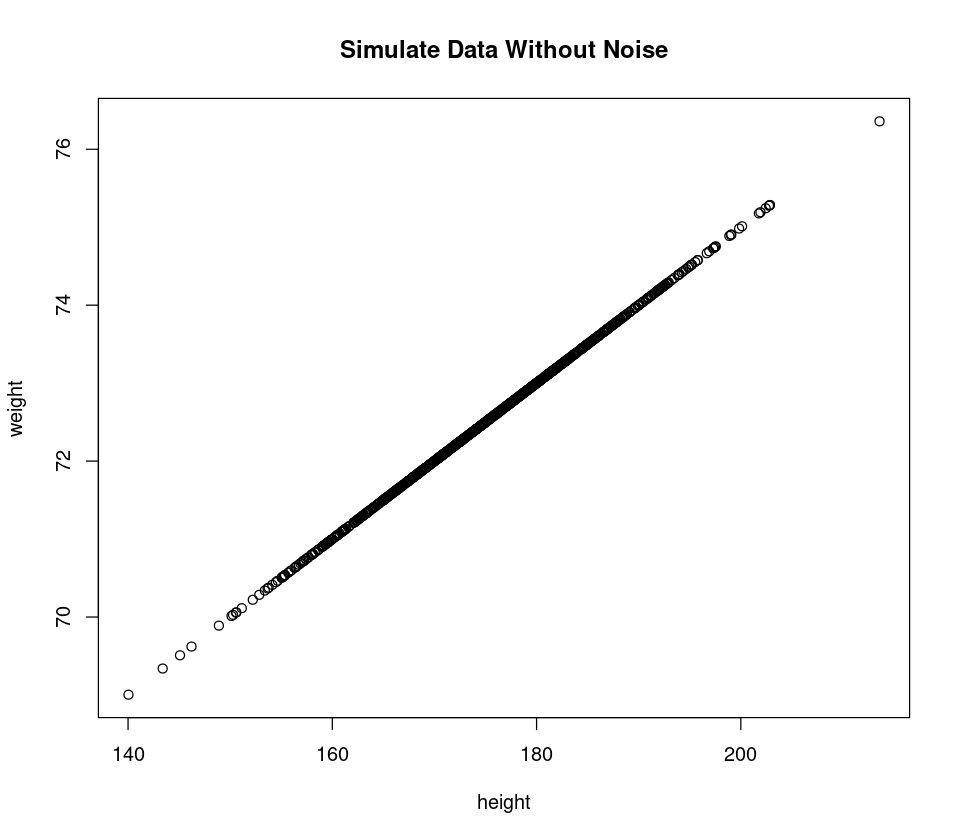

In [13]:
# generate weight
# CHANGE THE NUMBER AND PLAY WITH IT :) 
weight <- 55 + 0.1 * height

# plot scatter plot
plot(height, weight, main = "Simulate Data Without Noise")

In [14]:
# now let's fit a linear regression model
sm1 <- lm(weight ~ height)

stargazer(sm1, type = "text")


                                        Dependent variable:                    
                    -----------------------------------------------------------
                                              weight                           
-------------------------------------------------------------------------------
height                                       0.100***                          
                                              (0.000)                          
                                                                               
Constant                                     55.000***                         
                                              (0.000)                          
                                                                               
-------------------------------------------------------------------------------
Observations                                    900                            
R2                                     

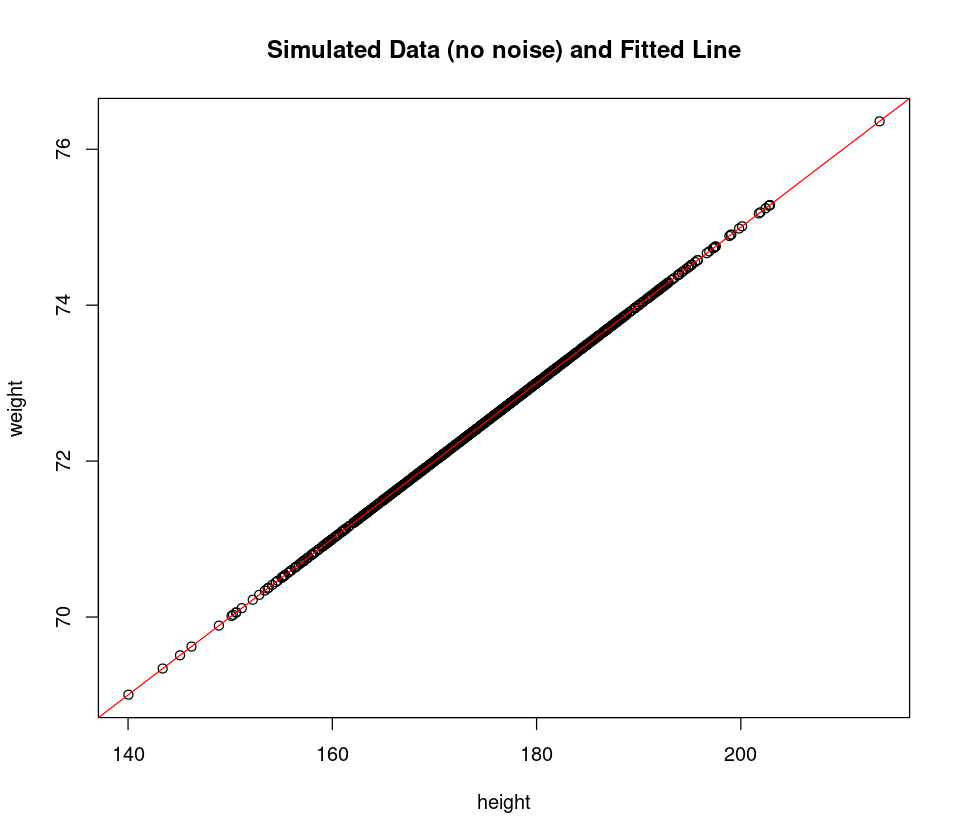

In [15]:
plot(height, weight, main = "Simulated Data (no noise) and Fitted Line")
abline(sm1, col='red')

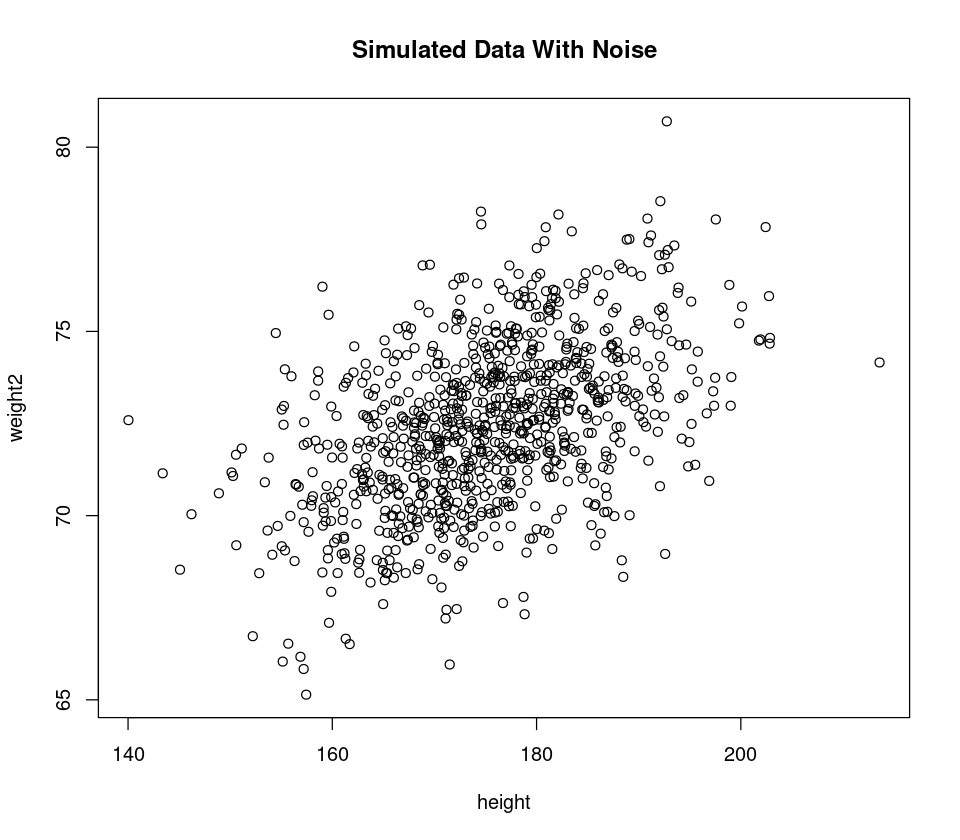

In [16]:
# add some noise to weight
# weight = 55 + 0.1 * height
# weight2 = weight + noize (rnorm)
weight2 <- weight + rnorm(900, mean = 0, sd = 2)

# plot scatter plot
plot(height, weight2, main = "Simulated Data With Noise")

In [17]:
# now we will fit linear regression with weight2 ~ height
sm2 <- lm(weight2 ~ height)

# print out the model
stargazer(sm1, sm2, type = "text")


                                                 Dependent variable:                   
                               --------------------------------------------------------
                                                  weight                      weight2  
                                                    (1)                         (2)    
---------------------------------------------------------------------------------------
height                                           0.100***                     0.104*** 
                                                  (0.000)                     (0.006)  
                                                                                       
Constant                                         55.000***                   54.318*** 
                                                  (0.000)                     (1.123)  
                                                                                       
-------------------------------

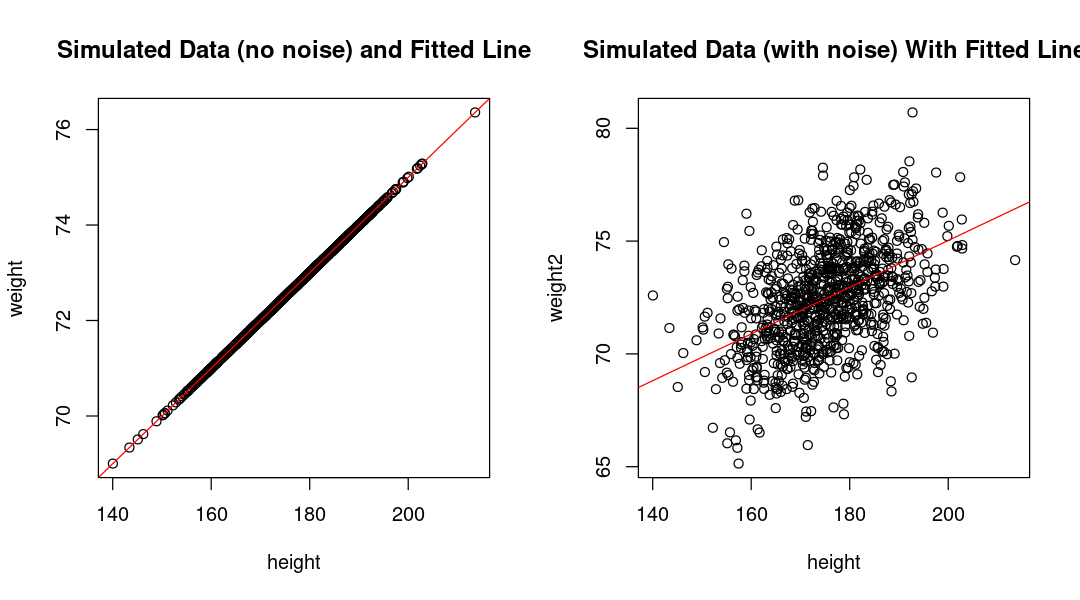

In [18]:
# add fitted line
options(repr.plot.width = 9, repr.plot.height = 5)
par(mfrow = c(1, 2))
plot(height, weight, main = "Simulated Data (no noise) and Fitted Line")
abline(sm1, col='red')
plot(height, weight2, main = "Simulated Data (with noise) With Fitted Line")
# add model 
abline(sm2, col='red')

### Control variables (from one to two, then to three)

- univariate analysis (one variable)
- bivariate analysis (two variable)
- multivatte anaysis (more than two)

Let's review what we have done:

1. simulate one variable (height, follows the normal distribution)

$$height \sim N(175, 10)$$

2. assume there is a perfect linear relationship between `weight` and `height` such as

$$
weight = 55 + 0.1 * height 
$$

3. add noise into the data because there is no perfect thing in the real life (except for the GOD)

$$
weight = 55 + 0.1 * height + \epsilon; \quad \epsilon \sim N(0, 2)
$$

4. bring one more variable into our analysis, let's say gender (female/male)

In [19]:
# generate height for female
height_female <- rnorm(450, 170, 5)
female_character <- rep("female", 450)
height_male <- rnorm(450, 175, 10)
male_character <- rep('male', 450)
# put them together as a data.frame and then conver it to the data.table
sim_data <- data.frame(height = c(height_female, height_male), gender = c(female_character, male_character))
sim_data <- as.data.table(sim_data)
head(sim_data)

height,gender
<dbl>,<chr>
166.7037,female
170.3353,female
178.9171,female
166.1126,female
173.3576,female
171.2312,female


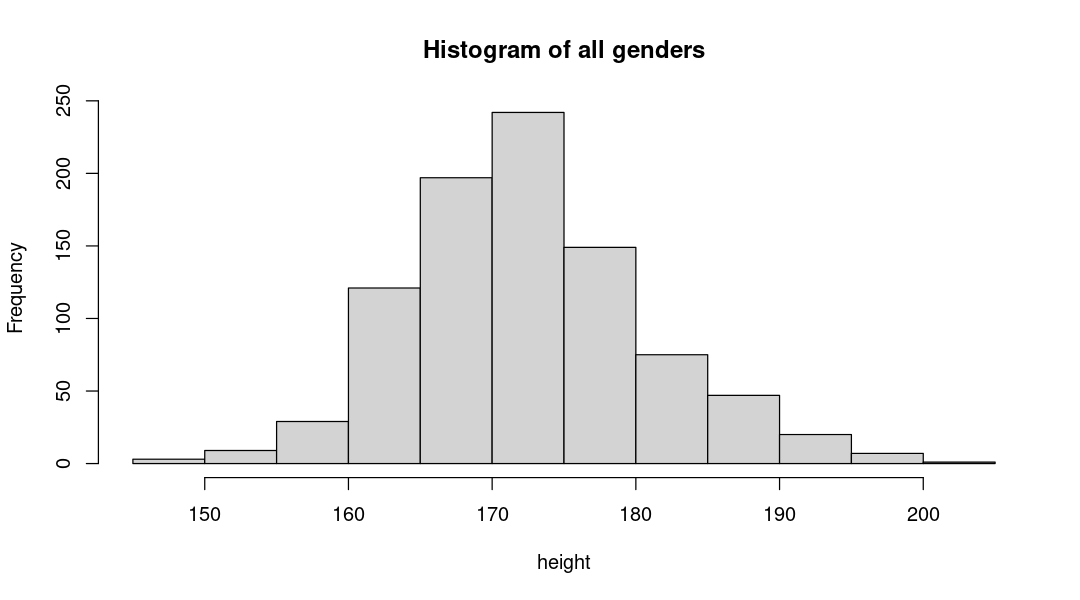

In [20]:
sim_data %>%
    with(hist(height, main="Histogram of all genders"))

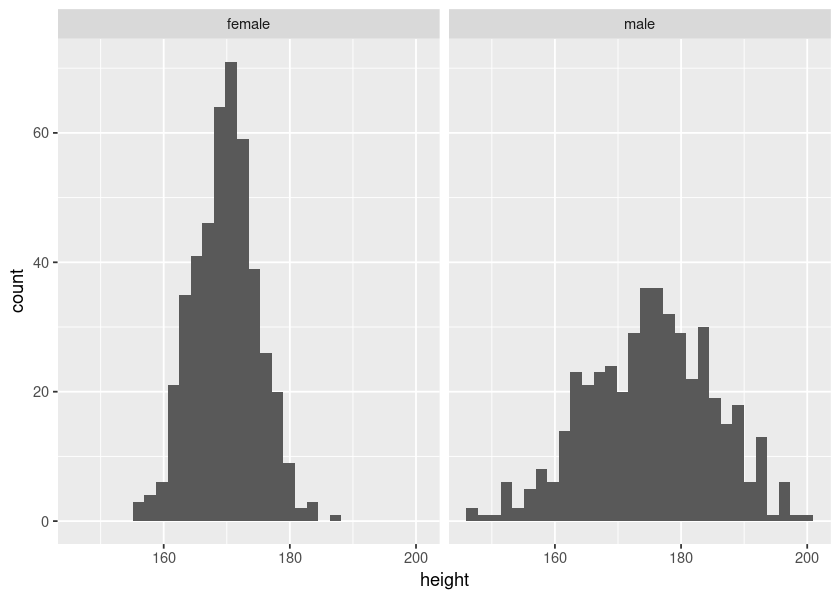

In [21]:
options(repr.plot.width = 7, repr.plot.height = 5)
sim_data %>%
    ggplot(aes(x=height)) +
    geom_histogram(bins=30) + 
    facet_wrap(~gender)

### Control variables (from one to two, then to three)

- univariate analysis (one variable)
- bivariate analysis (two variable)
- multivatte anaysis (more than two)

Let's review what we have done:

1. simulate one variable (height, follows the normal distribution)

$$height \sim N(175, 10)$$

2. assume there is a perfect linear relationship between `weight` and `height` such as

$$
weight = 55 + 0.1 * height 
$$

3. add noise into the data because there is no perfect thing in the real life (except for the GOD)

$$
weight = 55 + 0.1 * height + \epsilon; \quad \epsilon \sim N(0, 2)
$$

4. bring one more variable into our analysis, let's say gender (female/male)

5. for female, the distribution of height might be different from male

$$
height_f \sim N(170, 5); \quad height_m \sim N(175, 10)
$$

6. the relationship between height and weight is different for female and male

$$
weight_f = 50 + 0.09 * height_f; \quad weight_m = 55 + 0.1 * height_m
$$

__You can see that the complexity has already kicks in even for onlhy three variables__. 

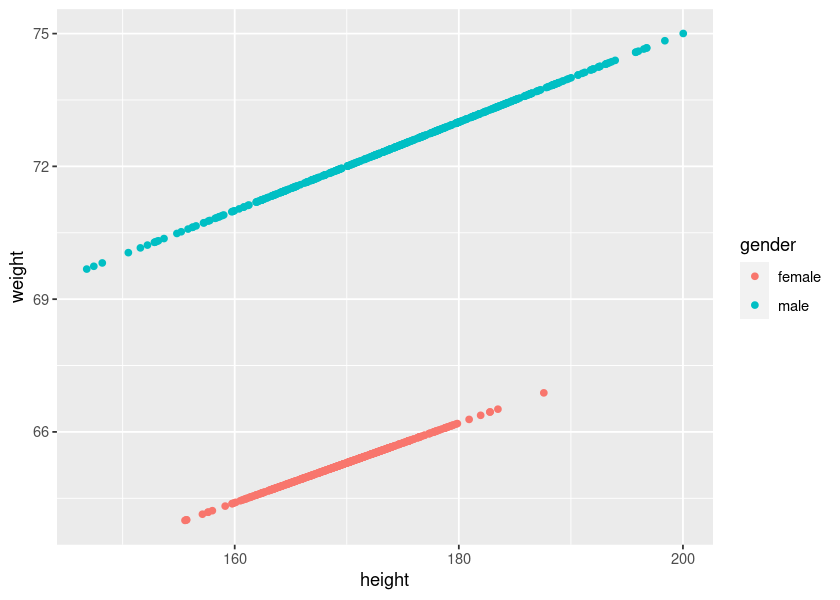

In [22]:
# add weight
sim_data %>%
    #[i, j, by]
    .[, weight := ifelse(gender=="female", 50 + 0.09*height, 55 + 0.1 * height)] %>%
    ggplot(aes(x=height, y=weight, color=gender)) + 
    geom_point()

In [23]:
# generate height for female
height_female <- rnorm(450, 170, 5)
female_character <- rep("female", 450)
height_male <- rnorm(450, 175, 10)
male_character <- rep('male', 450)
# put them together as a data.frame and then conver it to the data.table
sim_data <- data.frame(height = c(height_female, height_male), gender = c(female_character, male_character))
sim_data <- as.data.table(sim_data)

sim_data %>%
    #[i, j, by]
    .[, weight := ifelse(gender=="female", 50 + 0.09 *height, 55 + 0.1 * height)] -> sim_data2

head(sim_data2)

height,gender,weight
<dbl>,<chr>,<dbl>
173.1077,female,65.57969
172.3853,female,65.51468
173.6183,female,65.62565
164.7042,female,64.82337
177.2938,female,65.95644
174.2201,female,65.67981


We now assume that relationship between `weight` and `height` following the simple linear one:

$$
weight = \beta_0 + \beta_1 height + \epsilon; \quad \epsilon \sim N(0, sd)
$$

In [24]:
sm3 <- lm(weight ~ height, data=sim_data2)
stargazer(sm3, type="text")


                        Dependent variable:    
                    ---------------------------
                              weight           
-----------------------------------------------
height                       0.210***          
                              (0.013)          
                                               
Constant                     32.724***         
                              (2.270)          
                                               
-----------------------------------------------
Observations                    900            
R2                             0.221           
Adjusted R2                    0.220           
Residual Std. Error      3.232 (df = 898)      
F Statistic          254.563*** (df = 1; 898)  
Note:               *p<0.1; **p<0.05; ***p<0.01


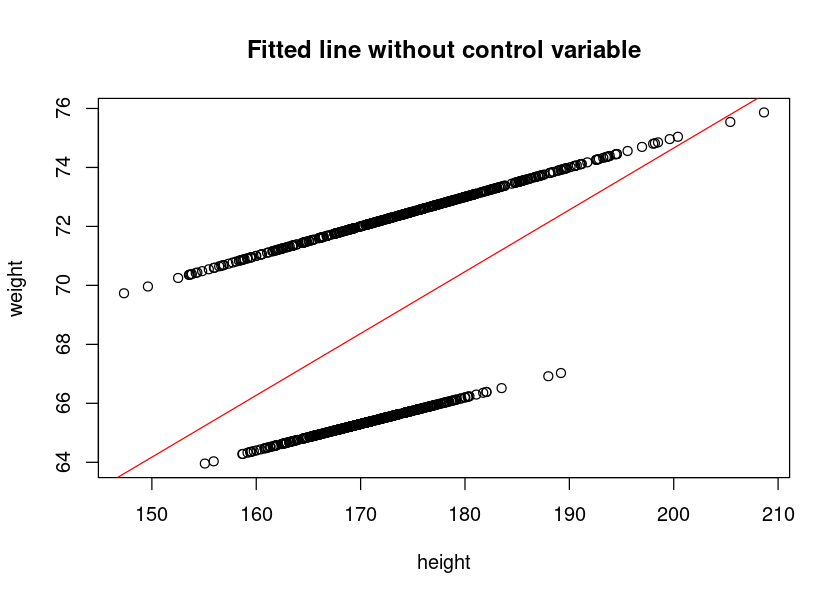

In [25]:
sim_data2 %>%
    with(plot(height, weight, main = "Fitted line without control variable")) 
abline(sm3, col='red')

### Control variable

Control variable is a variable that is included in a statistical or research analysis to account for potential confounding factors or to assess the relationship between the independent and dependent variables __while holding other factors constant__. In the regression analysis we control different factors by adding control variables:

$$
weight = \beta_0 + \beta_1 height + \beta_2 gender + \epsilon
$$

The relationship between height and weight is different for female and male

$$
weight_f = 50 + 0.09 * height_f; \quad weight_m = 55 + 0.1 * height_m
$$

$$
weight = 48.63 + 0.098 * height + 6.7 * gender_m
$$

if $gender_m =1$ we will have

$$
weight = 48.63 + 0.098 * height + 6.7 = 55.337 +  0.098 * height
$$

In [26]:
# adding gender as control variable
sm4 <- lm(weight ~ height + gender, data=sim_data2)
stargazer(sm3, sm4, type="text")


                                      Dependent variable:                  
                    -------------------------------------------------------
                                            weight                         
                              (1)                         (2)              
---------------------------------------------------------------------------
height                      0.210***                    0.098***           
                            (0.013)                     (0.0001)           
                                                                           
gendermale                                              6.712***           
                                                        (0.002)            
                                                                           
Constant                   32.724***                   48.639***           
                            (2.270)                     (0.023)            
           

Warning message in abline(sm4, col = "red"):
“only using the first two of 3 regression coefficients”


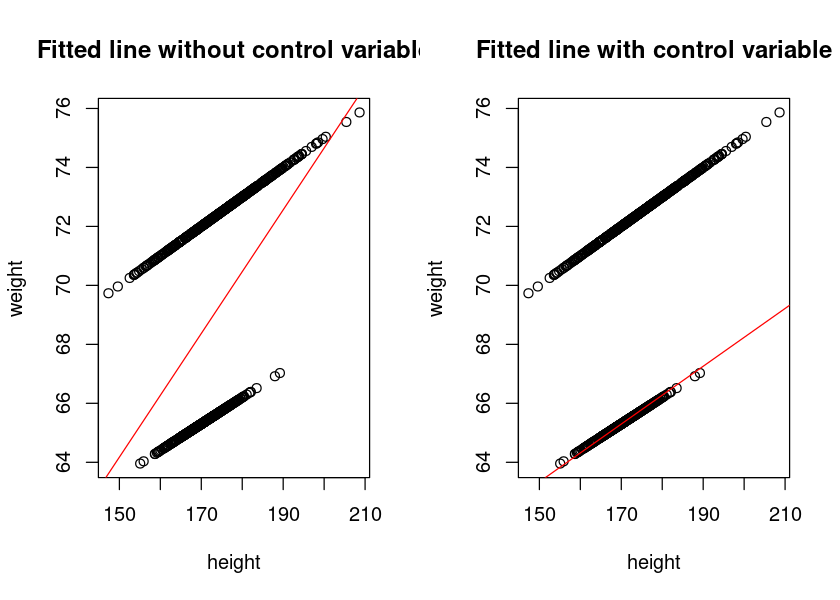

In [27]:
par(mfrow = c(1, 2))
sim_data2 %>%
    with(plot(height, weight, main = "Fitted line without control variable")) 
abline(sm3, col='red')
sim_data2 %>%
    with(plot(height, weight, main = "Fitted line with control variable")) 
abline(sm4, col='red')

### Summary

- univariate (one- D)
- bivariate (two: D and A)
- multivariate (more than two, such as three: D - A and B) 

The relationship between `weight` (D) and `height` (A) is different for different genders (B). This kind of framework is very common for many regression analysis:

- __relationship between innovation (measured by patent numbers) and export intensity could be different for different
industries__

$$
innovation = \beta_0 + \beta_1 exportIntensity + \beta_2 industry + \beta_3 firmSize + ... + \epsilon 
$$

### Interpretation of regression analysis


__It is very important to know how to interpret the regression analysis results__. Again,
here we are __not talking about__ the causal relationship, but __the association between the dependent
variable and independent variables__. We will use an example to show you. 

The dataset we will explore is about the relationship between wage and education. Based 
on our common sense, it is likely that the more education is normally __associated__ with higher wage.

In [32]:
# load the data
data("wage1")
# convert it to data.table
wage1 <- as.data.table(wage1)

head(wage1)

wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,⋯,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
3.10,11,2,0,0,1,0,2,1,0,⋯,0,0,0,0,0,0,0,1.131402,4,0
3.24,12,22,2,0,1,1,3,1,0,⋯,0,0,1,0,0,0,1,1.175573,484,4
3.00,11,2,0,0,0,0,2,0,0,⋯,0,1,0,0,0,0,0,1.098612,4,0
6.00,8,44,28,0,0,1,0,1,0,⋯,0,0,0,0,0,1,0,1.791759,1936,784
5.30,12,7,2,0,0,1,1,0,0,⋯,0,0,0,0,0,0,0,1.667707,49,4
8.75,16,9,8,0,0,1,0,1,0,⋯,0,0,0,1,1,0,0,2.169054,81,64


As we can see that we have many variables, however we are mainly interested in the relationship between `wage` and `education`, so we will only focus on these two variables and other control variables such as:


- wage: average hourly earnings
- educ: years of education
- exper: years of experience
- female: =1 if female otherwise =0

In [33]:
wage1 %>%
    # lwage = log transformation of wage 
    .[, .(wage, educ, exper, female, lwage)] %>%
    head()

wage,educ,exper,female,lwage
<dbl>,<int>,<int>,<int>,<dbl>
3.10,11,2,1,1.131402
3.24,12,22,1,1.175573
3.00,11,2,0,1.098612
6.00,8,44,0,1.791759
5.30,12,7,0,1.667707
8.75,16,9,0,2.169054


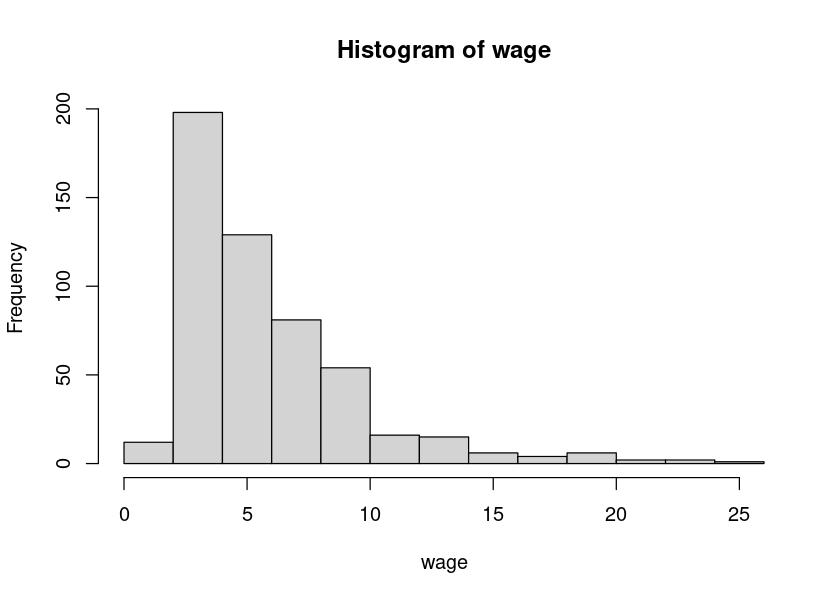

In [34]:
wage1 %>%
    with(hist(wage))

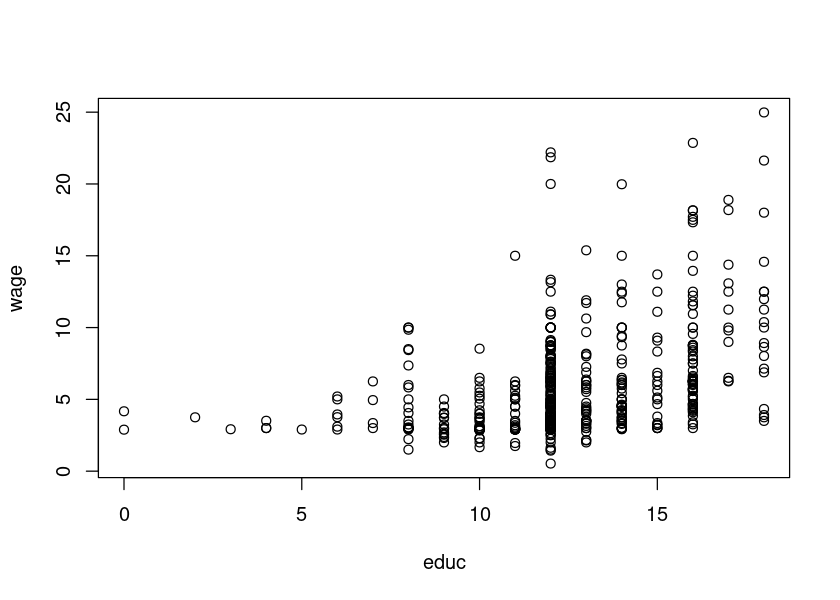

In [35]:
# bivariate analysis
wage1 %>%
    with(plot(educ, wage))

In [36]:
# run regression
wage_reg1 <- lm(wage ~ educ, data=wage1)

stargazer(wage_reg1, type="text")


                        Dependent variable:    
                    ---------------------------
                               wage            
-----------------------------------------------
educ                         0.541***          
                              (0.053)          
                                               
Constant                      -0.905           
                              (0.685)          
                                               
-----------------------------------------------
Observations                    526            
R2                             0.165           
Adjusted R2                    0.163           
Residual Std. Error      3.378 (df = 524)      
F Statistic          103.363*** (df = 1; 524)  
Note:               *p<0.1; **p<0.05; ***p<0.01


The model predicts that __an increase in education of 1 year is associated with an increase of 0.5411 dollar an hour in wage__. The intercept of −0.9049 literally means that a person with no education has a predicted hourly wage of −90 cent an hour. __This, of course, is silly. Therefore, we must interpret this equation with caution__.

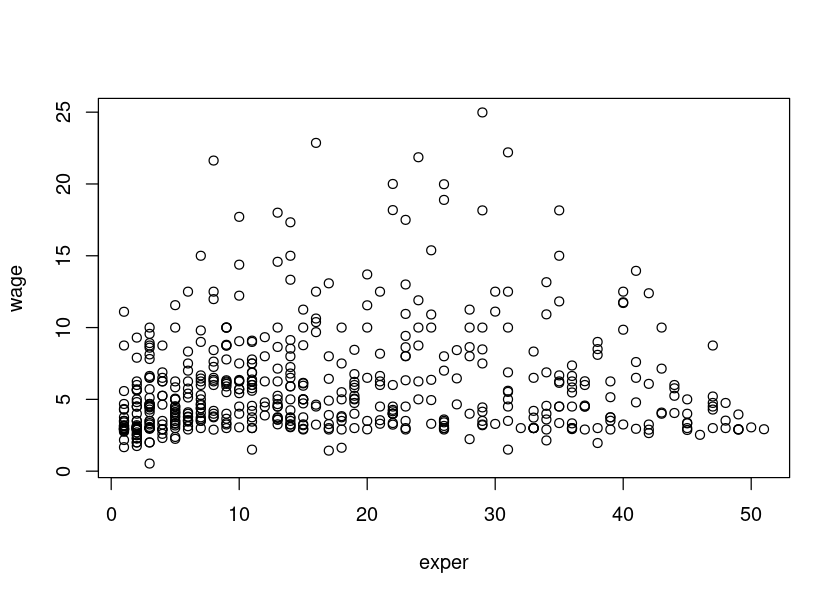

In [37]:
# now we continue to explore relationship between wage and exper
# bivariate: experience and wage 
wage1 %>%
    with(plot(exper, wage))

Here we notice that there is some __nonlinear relationship__ between `wage` and `exper`,
which is not surprising. The wage normally increases with experience, but it will stop 
after reaching a certain level. For instance, most people will not get a higher wage after
working for 20 to 30 years (say after 60 years old).

In [38]:
# let's run regression
wage_reg2 <- lm(wage ~ educ + exper, data=wage1)

stargazer(wage_reg2, type="text")


                        Dependent variable:    
                    ---------------------------
                               wage            
-----------------------------------------------
educ                         0.644***          
                              (0.054)          
                                               
exper                        0.070***          
                              (0.011)          
                                               
Constant                     -3.391***         
                              (0.767)          
                                               
-----------------------------------------------
Observations                    526            
R2                             0.225           
Adjusted R2                    0.222           
Residual Std. Error      3.257 (df = 523)      
F Statistic           75.990*** (df = 2; 523)  
Note:               *p<0.1; **p<0.05; ***p<0.01


In [39]:
# let's add non-linear term
wage_reg3 <- lm(wage ~ educ + exper + I(exper^2), data=wage1)

stargazer(wage_reg1, wage_reg2, wage_reg3, type="text")


                                              Dependent variable:                           
                    ------------------------------------------------------------------------
                                                      wage                                  
                              (1)                      (2)                     (3)          
--------------------------------------------------------------------------------------------
educ                        0.541***                0.644***                0.595***        
                            (0.053)                  (0.054)                 (0.053)        
                                                                                            
exper                                               0.070***                0.268***        
                                                     (0.011)                 (0.037)        
                                                                     

With this model, here is how we will interpret the results: __holding other factors constant, an increase in education of 1 year is associated with an increase of 0.595 dollar an hour in wage__. The coefficient is significant at 1% level. For
experience, we can say that __holding other factors constant, there is an nonlinear relationship between experience and wage__. The wage will increase with experience, but it will stop after reaching a certain level.

The coefficients for `exper` and `exper2` are $0.268$ and $-0.005$, now let's plot the relationship between `wage` and `exper` holding other factors constant. This means we can have the following equation:

$$
wage = 0.268 \times exper - 0.005 \times exper^2
$$

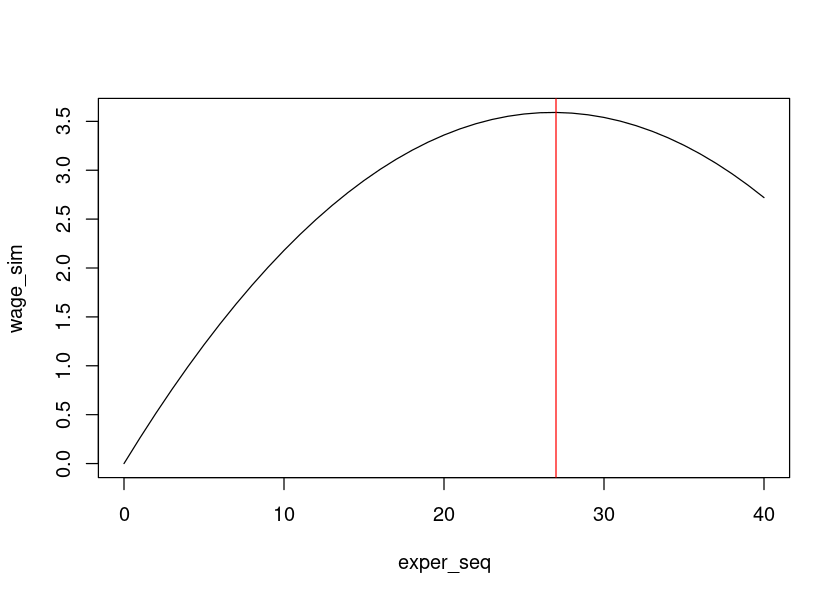

In [40]:
# simulate experience from 0 to 40 years
# seq = sequence generated from 0 to 30 with interval 1
exper_seq <- seq(0, 40, 1)
# ^2 means square
wage_sim <- 0.268 * exper_seq - 0.005 * exper_seq^2

# plot the relationship
plot(exper_seq, wage_sim, type="l")

# add vertical line
abline(v=27, col='red')

The model we estimated shows that the wage level stops increasing after 27 years of experience. You will not be aksed to do this kind of estimation in the exam. However, it is important to know how to interpret the regression results.
__Normally, many variables related to age and experienceare have properities of nonlinear__. For instance, the relationship between `wage` and `age` is nonlinear. The wage will increase with age, but it will stop after reaching a certain level.

integer(0)

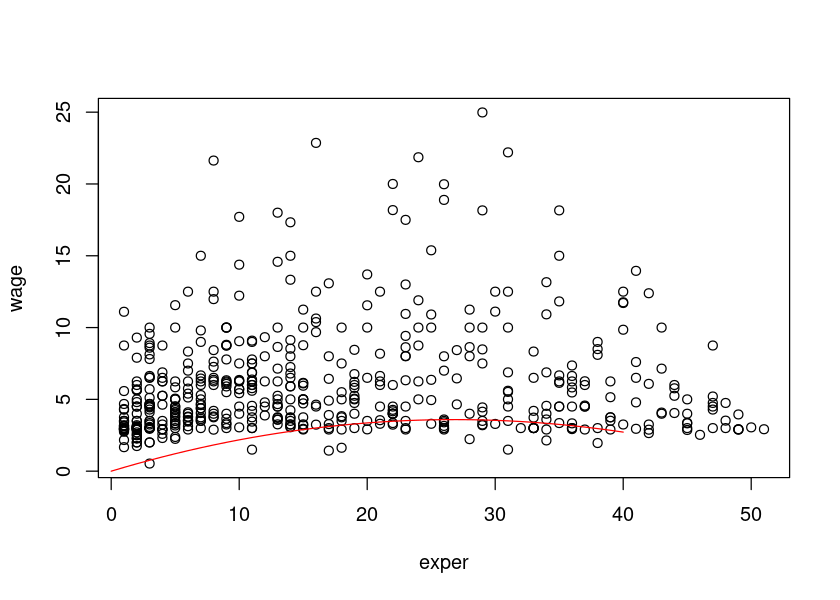

In [41]:
# we can put them together
wage1 %>%
    with(plot(exper, wage)) +
    lines(exper_seq, wage_sim, type="l", col='red')

Why the red curve above does not fit with the dataset exactly? Wage is real-lfe data, it is determined:

- educ
- experience
- industry
- networking
- other factors 

In the above model, the red curve was generated based on only factor `exper`:

$$
wage = 0.268 \times exper - 0.005 \times exper^2
$$

Here we only plot the relationship between `wage` and `exper` without considering other factors.
Be aware that `wage` is the average hourly earnings, which is from the real data. `wage`
is determined by many factors, such as education and industry. Now, image let's assume
__the wage was determined by the following equaion__:

$$
wage = 10+  0.268 \times exper - 0.005 \times exper^2
$$

This means that we have nonlinear relationship between `wage` and `exper`. The wage will increase with experience, but it will stop after reaching a certain level. Then, no matter what kind of industry you are in,
or degree you have, the relationship between `wage` and `exper` will be the same and everyone
will be added $10$ dollars per hour as a constant.

integer(0)

integer(0)

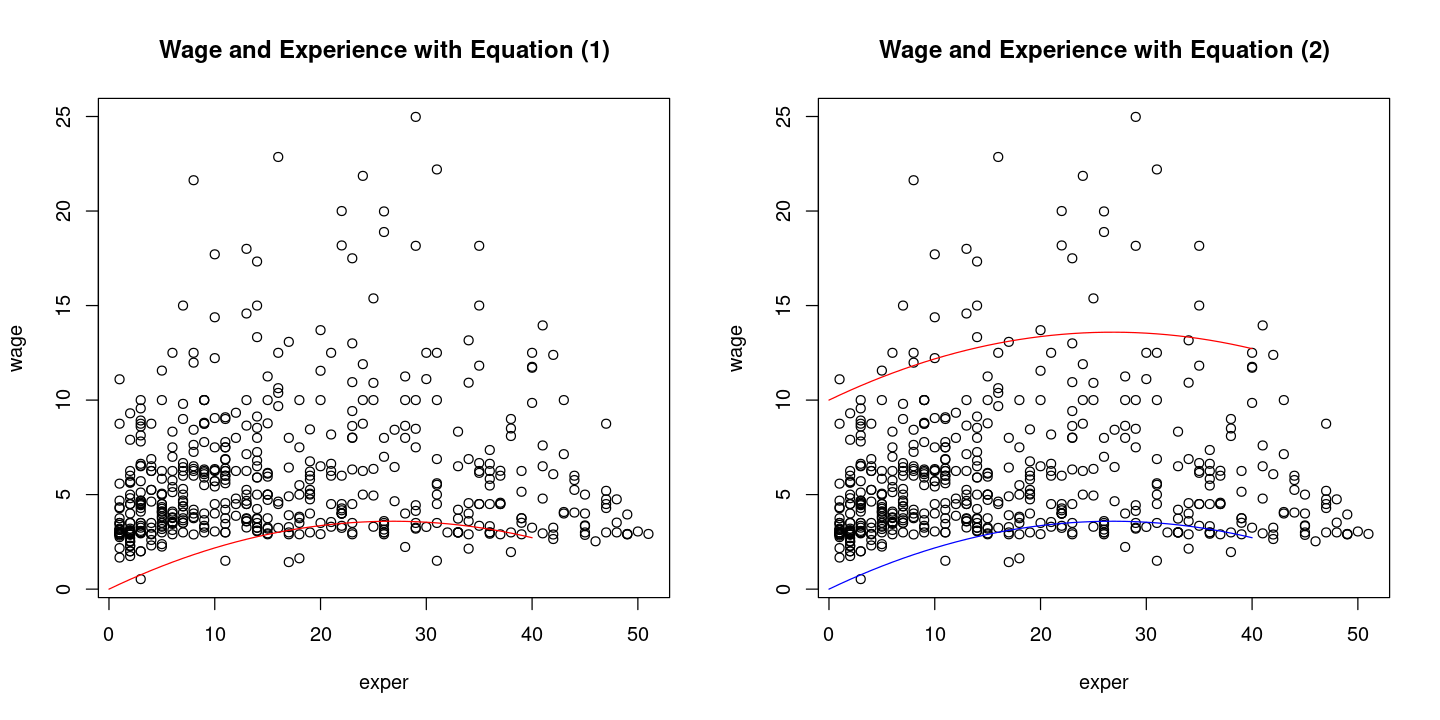

In [42]:
options(repr.plot.width = 12, repr.plot.height = 6)
par(mfrow = c(1, 2))
wage1 %>%
    with(plot(exper, wage, main = "Wage and Experience with Equation (1)")) +
    lines(exper_seq, wage_sim, type="l", col='red')

# let's simulate the above equation 
wage_sim2 <- 10 + 0.268 * exper_seq - 0.005 * exper_seq^2

# then we plot it again 
wage1 %>%
    with(plot(exper, wage, main = "Wage and Experience with Equation (2)")) +
    lines(exper_seq, wage_sim2, type="l", col='red') + 
    lines(exper_seq, wage_sim, type="l", col='blue') 

We have controled the experience, here is the short summary of the regression results:

give me a table with four columns and three rows

| dependent variable | independent variable of interested | control variable1 | control variable2 |
| --- | --- | --- | --- |
| wage | education: 0.541***  | | | 
| wage | eductation: 0.644***  | exper:  0.070*** | |
| wage | eductation: 0.595*** | exper:0.268*** | exper2: -0.005***  |

__The regression results are not causal__, but they are useful for us to understand the relationship between dependent variable and independent variables. Here we can be very confident to say that
__holding other factors constant, there is a very strong positive association between education and wage__. The reason is that the coefficient of education __did not change much__ when we add more control variables (such as experience). This means whether for people who have more experience or not, the education is still __positively associated__ with wage.

Now, how about the gender? __Does the relationship still hold for different genders?__ Let's run another regression analysis.

In [43]:
# add gender in the regression
wage_reg4 <- lm(wage ~ educ + exper + I(exper^2) + female, data=wage1)
stargazer(wage_reg4, type="text")


                        Dependent variable:    
                    ---------------------------
                               wage            
-----------------------------------------------
educ                         0.556***          
                              (0.050)          
                                               
exper                        0.255***          
                              (0.035)          
                                               
I(exper2)                    -0.004***         
                              (0.001)          
                                               
female                       -2.114***         
                              (0.263)          
                                               
Constant                     -2.319***         
                              (0.739)          
                                               
-----------------------------------------------
Observations                    526    

Here we notice that the coefficient for female is $-2.114$, which means __holding other 
factors constant, women is associated with a decrease of 2.114 dollar an hour in wage comparing to men__.
__This means even with same education, experience, there is still negative association between being female and 
wage__. Therefore, we can say this might be due to the gender discrimination in the labor market.

In [44]:
# now, let's put all tables together
stargazer(wage_reg2, wage_reg3, wage_reg4, type="text")


                                              Dependent variable:                          
                    -----------------------------------------------------------------------
                                                     wage                                  
                              (1)                     (2)                     (3)          
-------------------------------------------------------------------------------------------
educ                       0.644***                0.595***                0.556***        
                            (0.054)                 (0.053)                 (0.050)        
                                                                                           
exper                      0.070***                0.268***                0.255***        
                            (0.011)                 (0.037)                 (0.035)        
                                                                               

### Robustness check

__Robustness check__ is a very important concept in regression analysis. It is very important to check whether the results are robust to different specifications. For instance, we can run the regression analysis with different control variables. If the results are robust, then we can be more confident about the results.

### Regression diagnostics

After running the regression analysis, we need to check whether the results are reliable. There are many ways to check the reliability of the results. Here we will introduce two ways:

- __residual plot__: the residual plot is used to check whether the residuals are randomly distributed. If the residuals are randomly distributed, then we can say the results are reliable. Otherwise, we need to check the model specification. For instance, we might need to add more control variables to the model.

- __VIF__: VIF is used to check whether there is multicollinearity in the model. If the VIF is larger than 10, then we need to check whether there is multicollinearity in the model. If there is multicollinearity, then we need to remove some variables from the model.

### Log transformation

This only applies to continuous variables (like wage, R&D, etc. for variables like yes/no, female/male)

As we have discussed before, sometimes the dependent variable is not normally distributed.
For instance, the wage is not normally distributed. In this case, we can use log transformation
to make the dependent variable normally distributed. 

The original model is:

$$
wage = \beta_0 + \beta_1 \times educ + \beta_2 \times exper + \beta_3 \times exper^2 + \beta_4  \times female + \epsilon; \quad \epsilon \sim N(0, \sigma^2)
$$

In [45]:
stargazer(wage_reg1, wage_reg2, wage_reg3, wage_reg4, type="text")


                                                          Dependent variable:                                       
                    ------------------------------------------------------------------------------------------------
                                                                  wage                                              
                              (1)                      (2)                     (3)                     (4)          
--------------------------------------------------------------------------------------------------------------------
educ                        0.541***                0.644***                0.595***                0.556***        
                            (0.053)                  (0.054)                 (0.053)                 (0.050)        
                                                                                                                    
exper                                               0.070***   

Now, let's use log transformation on the dependent variable:

$$
\begin{aligned}
wage & = \beta_0 + \beta_1 \times educ + \beta_2 \times exper + \beta_3 \times exper^2 + \beta_4  \times female + \epsilon; \quad \epsilon \sim N(0, \sigma^2) \\
\ln(wage) & = \beta_0 + \beta_1 \times educ + \beta_2 \times exper + \beta_3 \times exper^2 + \beta_4  \times female + \epsilon; \quad \epsilon \sim N(0, \sigma^2)
\end{aligned}
$$

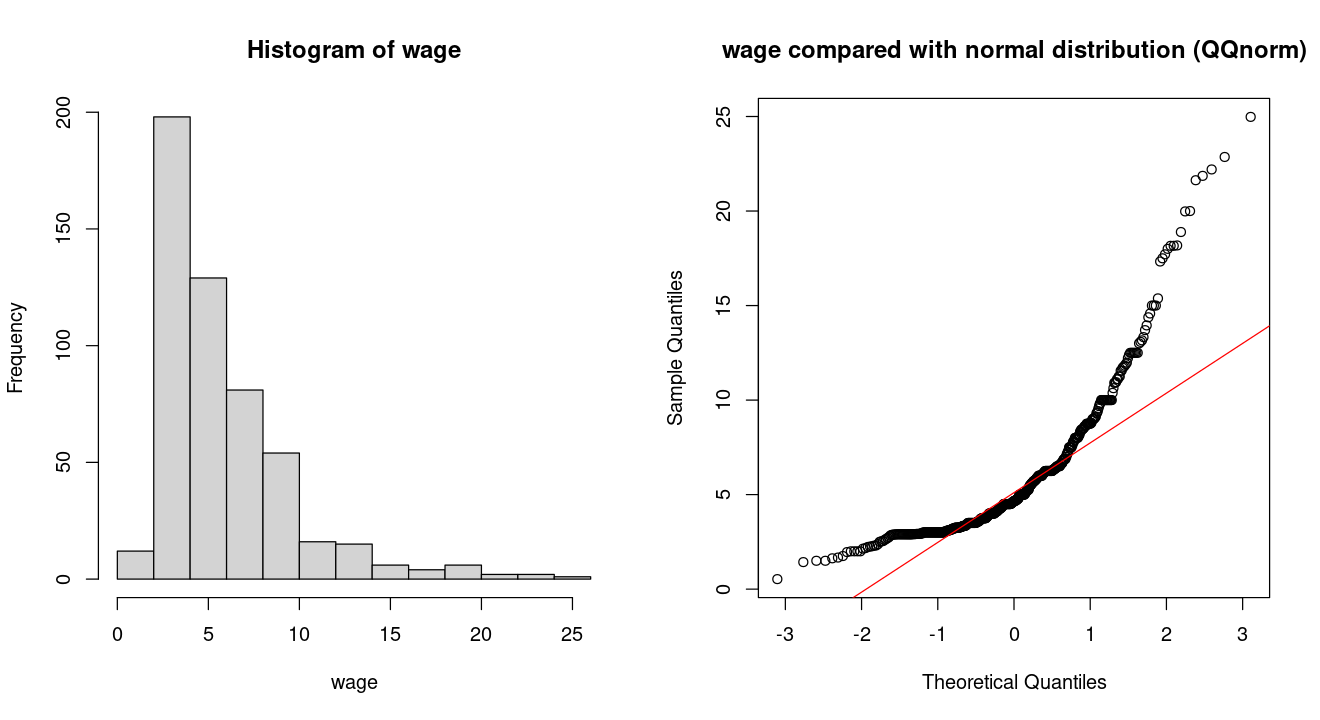

In [46]:
options(repr.plot.width = 11, repr.plot.height = 6)
par(mfrow=c(1,2))
wage1 %>%
    with(hist(wage))
qqnorm(wage1$wage, main="wage compared with normal distribution (QQnorm)") 
qqline(wage1$wage, col='red')

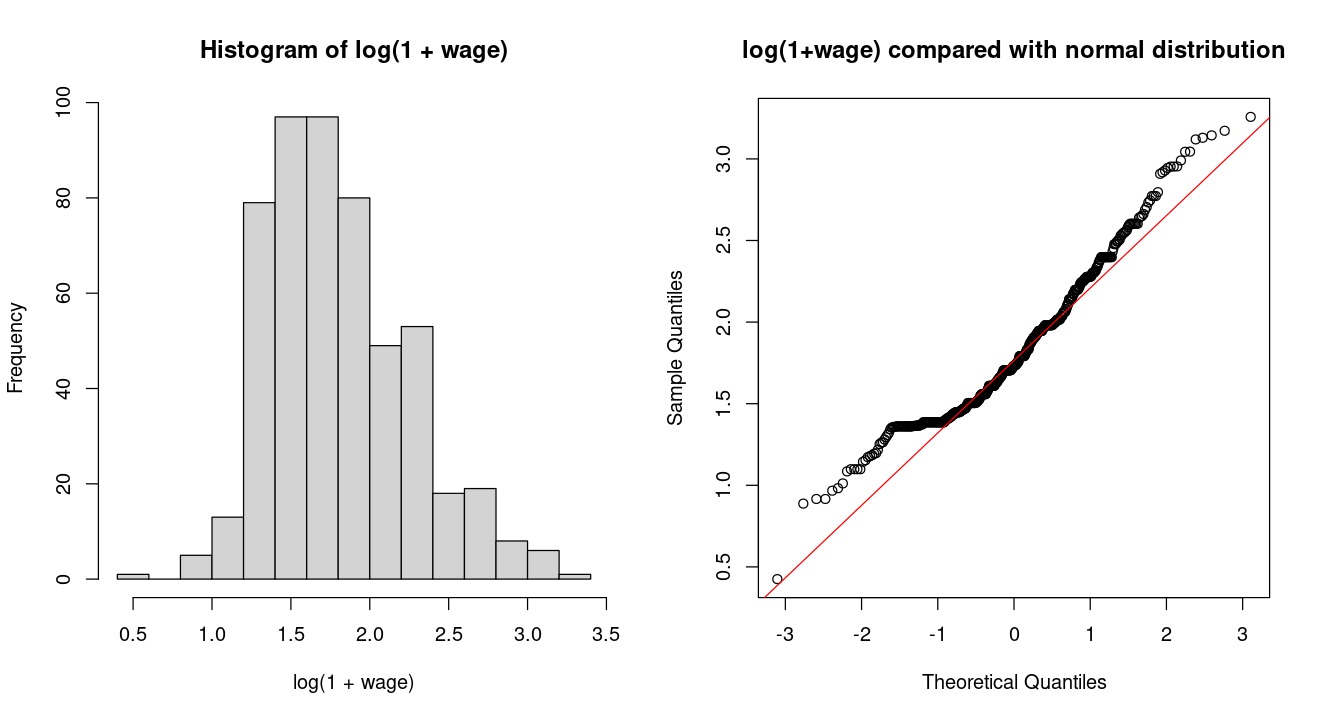

In [47]:
# log transformation for wage (depedent variable)
par(mfrow=c(1,2))
wage1 %>%
    with(hist(log(1+wage))) 
qqnorm(log(1+wage1$wage), main="log(1+wage) compared with normal distribution")
qqline(log(1+wage1$wage), col='red')

Now, we will fit with

$$
\ln(wage) = \beta_0 + \beta_1 \times educ + \beta_2 \times exper + \beta_3 \times exper^2 + \beta_4  \times female + \epsilon; \quad \epsilon \sim N(0, \sigma^2)
$$

In [48]:
# let's fit the model
wage_reg5 <- lm(log(1+wage) ~ educ + exper + I(exper^2) + female, data=wage1) 

stargazer(wage_reg5, type="text")


                        Dependent variable:    
                    ---------------------------
                           log(1 + wage)       
-----------------------------------------------
educ                         0.071***          
                              (0.006)          
                                               
exper                        0.033***          
                              (0.004)          
                                               
I(exper2)                    -0.001***         
                             (0.0001)          
                                               
female                       -0.283***         
                              (0.030)          
                                               
Constant                     0.784***          
                              (0.086)          
                                               
-----------------------------------------------
Observations                    526    

Since we are dealing with log transformation now. The interpretation will be different. The following table 
gives the summary

| | $X$ | $\ln(X)$ |
| --- | --- | --- |
|$Y$| linear: $Y = \beta_0 + \beta_1 X $ | linear-log: $Y=\beta_0 + \beta_1 \ln(X)$ | 
| | one unit change in $X$ is associated with $\beta_1$ change in $Y$ | one unit change in $X$ is associated with $\beta_1/100$ change in $Y$ |
|$\ln(Y)$| log-linear  $\ln(Y) = \beta_0 + \beta_1 X $ | log-log: $\ln(Y) = \beta_0 + \beta_1 \ln(X) $ |
| |one unit change in $X$ is associated with $100 \cdot \beta_1$ percentage change in $Y$  | one percentage change in $X$ is associated with $\beta_1$ percent change in $Y$  |

In [49]:
# put everything together
stargazer(wage_reg2, wage_reg3, wage_reg4, wage_reg5, type="text")


                                                          Dependent variable:                                      
                    -----------------------------------------------------------------------------------------------
                                                     wage                                        log(1 + wage)     
                              (1)                     (2)                     (3)                     (4)          
-------------------------------------------------------------------------------------------------------------------
educ                       0.644***                0.595***                0.556***                0.071***        
                            (0.054)                 (0.053)                 (0.050)                 (0.006)        
                                                                                                                   
exper                      0.070***                0.268***            

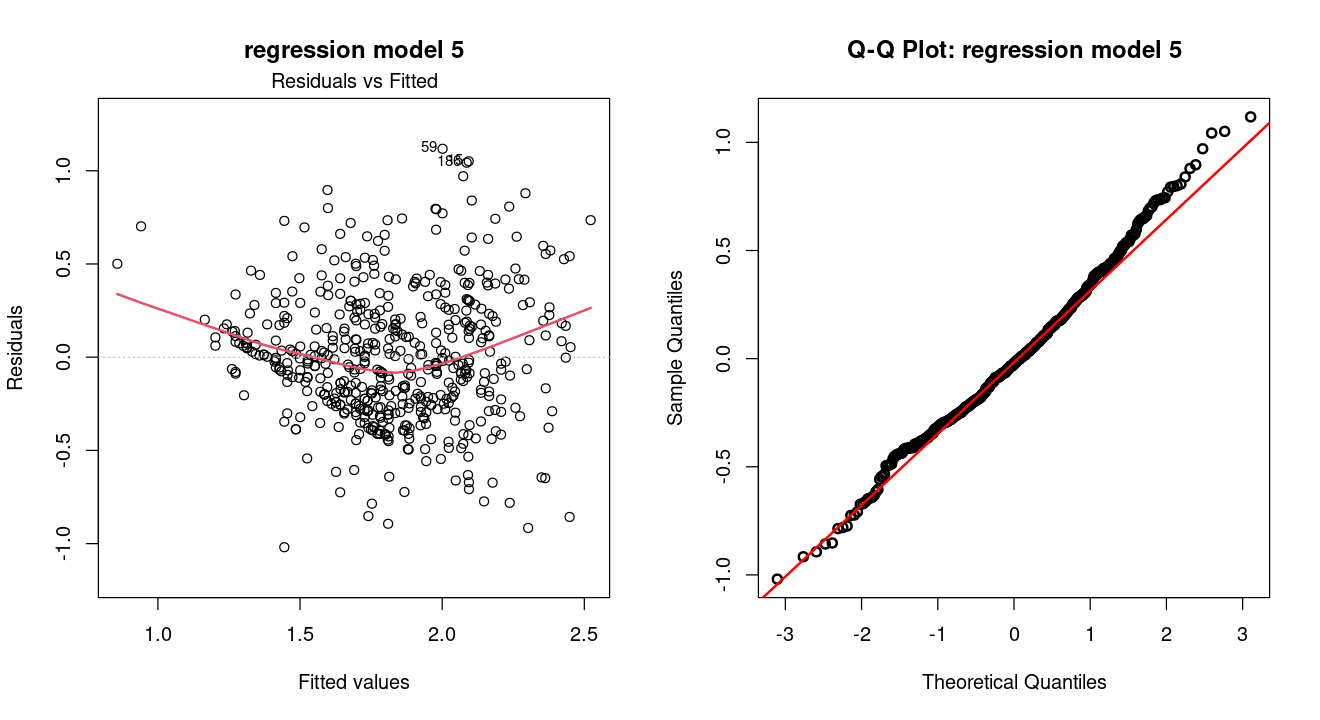

In [50]:
# residual plot for log transformation 
options(repr.plot.width = 11, repr.plot.height = 6)
par(mfrow=c(1,2))
plot(wage_reg5, which=1, lwd=2, main="regression model 5")
qqnorm(resid(wage_reg5),lwd=2, main="Q-Q Plot: regression model 5")
qqline(resid(wage_reg5), col='red', lwd=2)

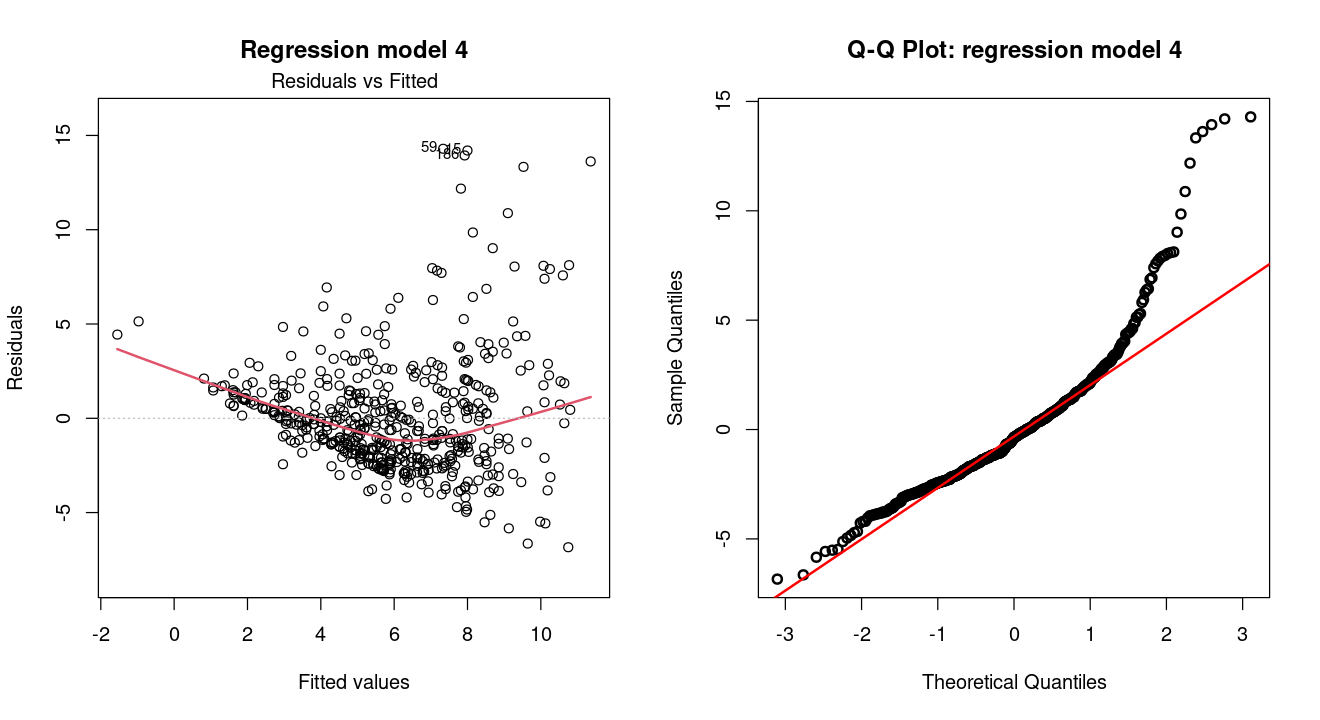

In [51]:
# residual plot without log transformation 
options(repr.plot.width = 11, repr.plot.height = 6)
par(mfrow=c(1,2))
plot(wage_reg4, which=1, lwd=2, main="Regression model 4")
qqnorm(resid(wage_reg4),lwd=2, main="Q-Q Plot: regression model 4")
qqline(resid(wage_reg4), col='red', lwd=2)

### Summary

- why we need control variables
- check whether the coefficient is consistent or not by adding different control variables 
- using dummy variable - gender discrimination 
- why we need log transformation
- how to interpret the log transformation

### The another example

Now, let's use another example to illustrate the regression analysis. The data is about
the relationship between research and development expenditure and the sales.

In [52]:
data(rdchem)
# convert it to data.table
rdchem <- as.data.table(rdchem)

head(rdchem)

rd,sales,profits,rdintens,profmarg,salessq,lsales,lrd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
430.6,4570.2,186.9,9.421906,4.089536,20886730.00,8.427312,6.0651798
59.0,2830.0,467.0,2.084806,16.501766,8008900.00,7.948032,4.0775375
23.5,596.8,107.4,3.937668,17.995979,356170.22,6.391582,3.1570003
3.5,133.6,-4.3,2.619760,-3.218563,17848.96,4.894850,1.2527629
1.7,42.0,8.0,4.047619,19.047619,1764.00,3.737670,0.5306283
8.4,390.0,47.3,2.153846,12.128205,152100.00,5.966147,2.1282318


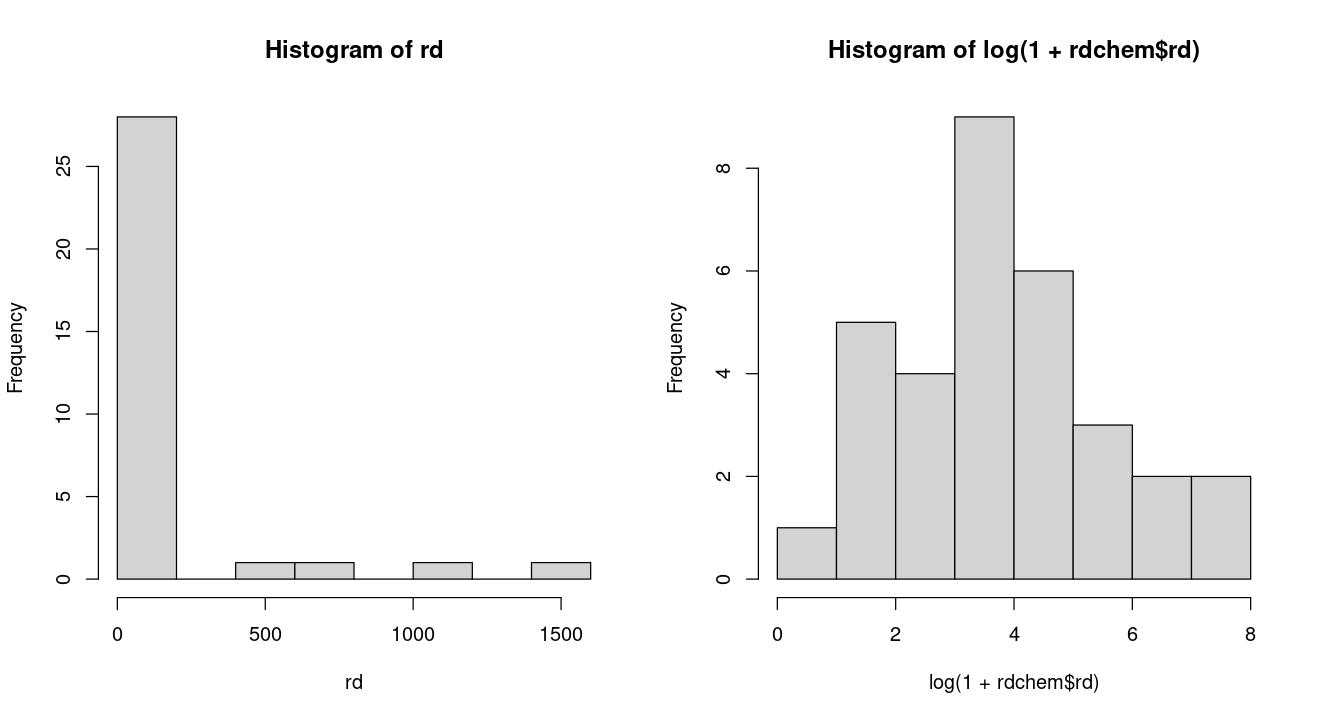

In [53]:
# univariate analysis
par(mfrow=c(1,2))
rdchem %>%
    with(hist(rd))

hist(log(1+rdchem$rd))

We will fit two mdels:

$$
R\&D = \beta_0 + \beta_1 \times sales + \beta_2 \times profitMargin + \epsilon; \quad \epsilon \sim N(0, \sigma^2)
$$

and 

$$
\ln(R\&D) = \beta_0 + \beta_1 \times sales + \beta_2 \times profitMargin + \epsilon; \quad \epsilon \sim N(0, \sigma^2)
$$

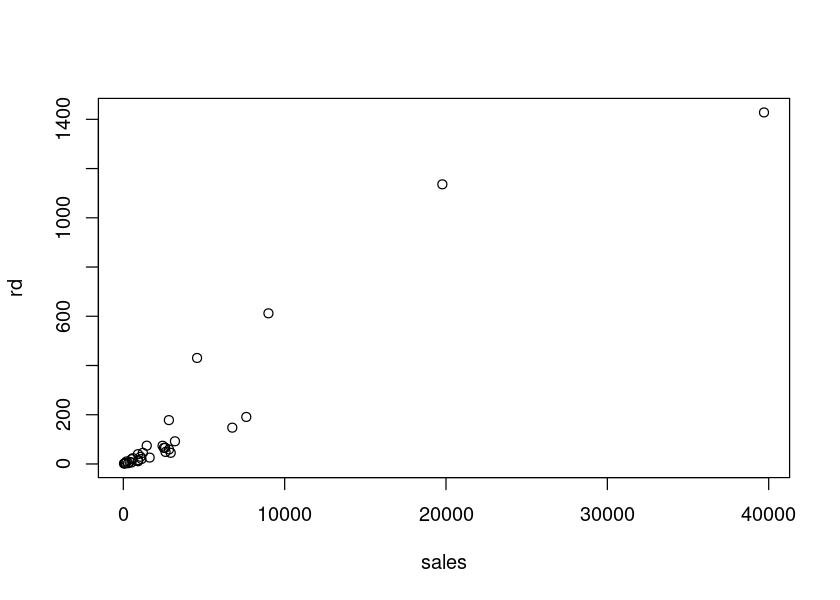

In [54]:
options(repr.plot.width = 7, repr.plot.height = 5)
rdchem %>%
    with(plot(sales, rd))

In [55]:
rd_reg1 <- lm(rd ~ sales + profmarg, data=rdchem)
rd_reg2 <- lm(log(1+rd) ~ sales + profmarg, data=rdchem)

stargazer(rd_reg1, rd_reg2, type="text")


                                  Dependent variable:     
                              ----------------------------
                                    rd        log(1 + rd) 
                                   (1)            (2)     
----------------------------------------------------------
sales                            0.041***      0.0002***  
                                 (0.002)       (0.00003)  
                                                          
profmarg                          0.857          0.003    
                                 (2.605)        (0.030)   
                                                          
Constant                          -9.013       3.076***   
                                 (33.025)       (0.380)   
                                                          
----------------------------------------------------------
Observations                        32            32      
R2                                0.902          0.495 

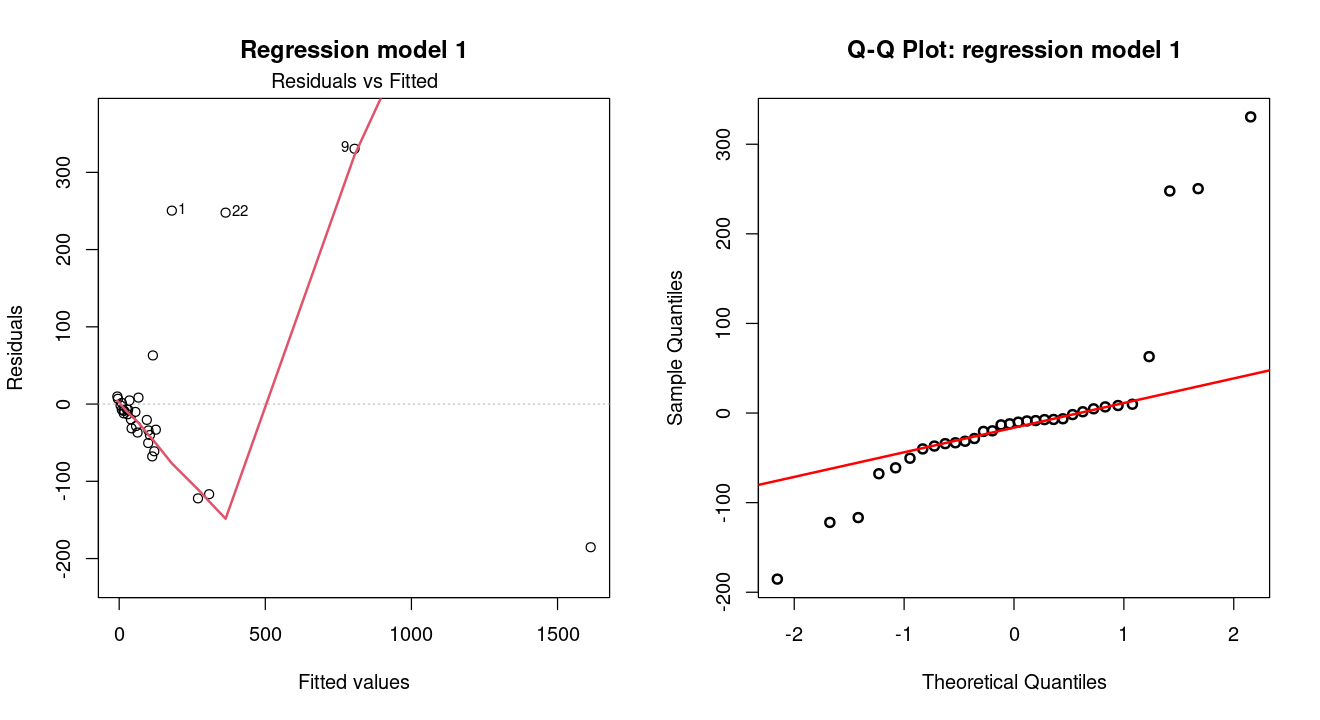

In [56]:
# check residual plot
options(repr.plot.width = 11, repr.plot.height = 6)
par(mfrow=c(1,2))
plot(rd_reg1, which=1, lwd=2, main="Regression model 1")
qqnorm(resid(rd_reg1),lwd=2, main="Q-Q Plot: regression model 1")
qqline(resid(rd_reg1), col='red', lwd=2)

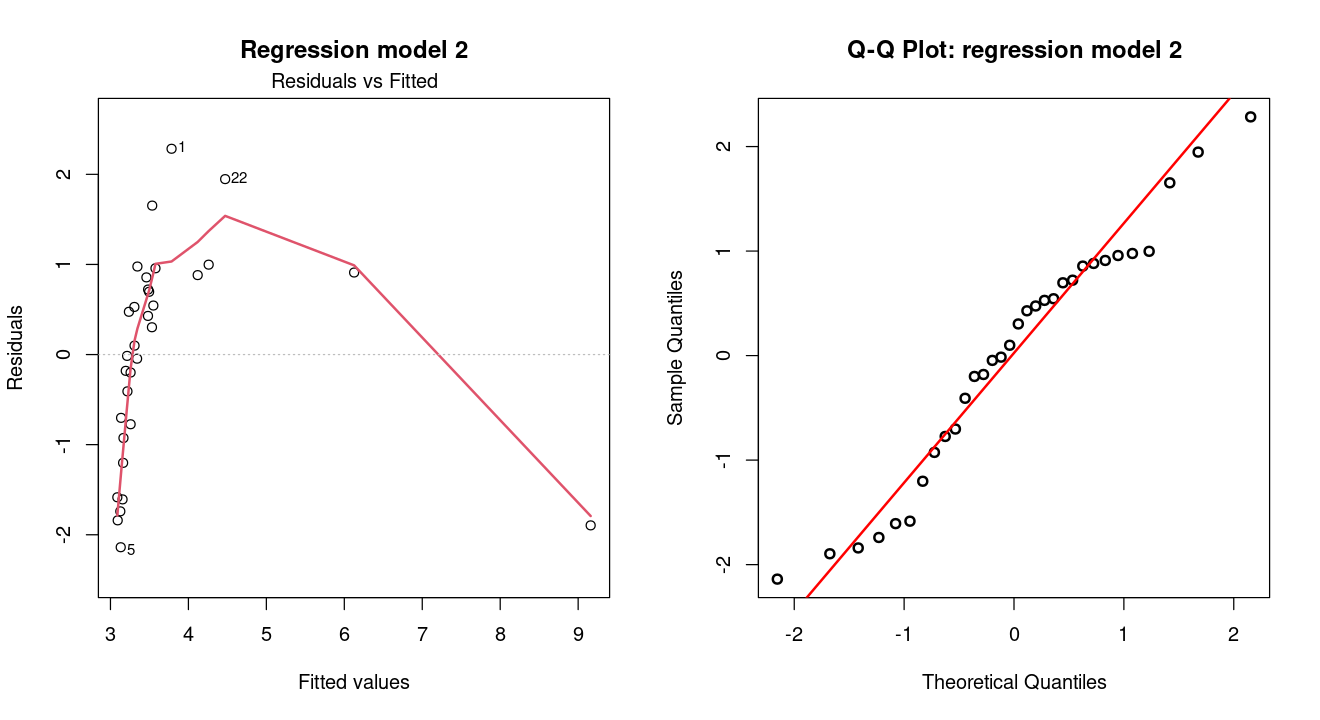

In [57]:
options(repr.plot.width = 11, repr.plot.height = 6)
par(mfrow=c(1,2))
plot(rd_reg2, which=1, lwd=2, main="Regression model 2")
qqnorm(resid(rd_reg2),lwd=2, main="Q-Q Plot: regression model 2")
qqline(resid(rd_reg2), col='red', lwd=2)

### Multicollienarity

Multicollienarity is a very important concept in regression analysis. It means that there is a strong correlation between two or more independent variables. For instance, if we have two independent variables, $X_1$ and $X_2$, and they are strongly correlated, then we say there is a multicollinearity in the model.

This will cause the following problems:

- it increases the variance of the coefficients and makes the coefficients less reliable.
- it makes the interpretation of the coefficients difficult.

We will simulate a dataset to illustrate the problem of multicollinearity.

We have simulated the relationship between `weight` and `height` as follows:

$$
weight = \beta_0 + \beta_1 \times height + \epsilon; \quad \epsilon \sim N(0, \sigma^2)
$$

![hand-span](https://milkatcarmel.files.wordpress.com/2016/10/hand-span-photo.jpg)


Now, let's add another variable called `handspan` to the model. The `handspan` is strongly correlated with `height`. On average, human's handspan is about 5% to 6% of the height. For instance, if the height is 170cm, then the handspan is about 9 cm. Therefore, we can simulate the `handspan` as follows:

$$
handspan =  0.3 + 0.05 \times height + \epsilon; \quad \epsilon \sim N(0, \sigma^2)
$$

At the same time, we assume that the `weight` is related to `height` as follows:

$$
weight = 55 + 0.1 * height + \epsilon; \quad \epsilon \sim N(0, 2)
$$

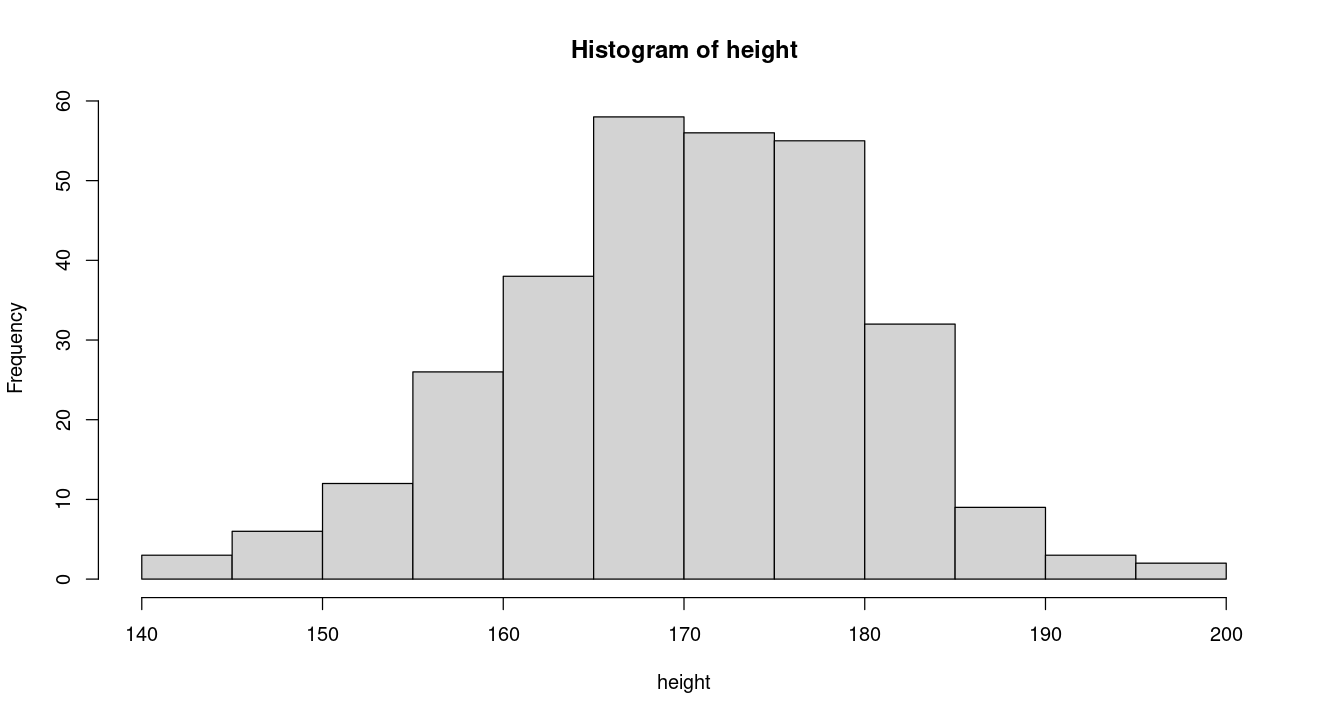

In [58]:
# generate height data with 300 observations mean = 170, sd = 10
height <- rnorm(300, 170, 10)
hist(height)

In [59]:
# generate handspan data
handspan <- 0.3 + 0.05 * height + rnorm(300, 0, 0.5)
# generate weight data
weight <- 55 + 0.1 * height + rnorm(300, 0, 2)

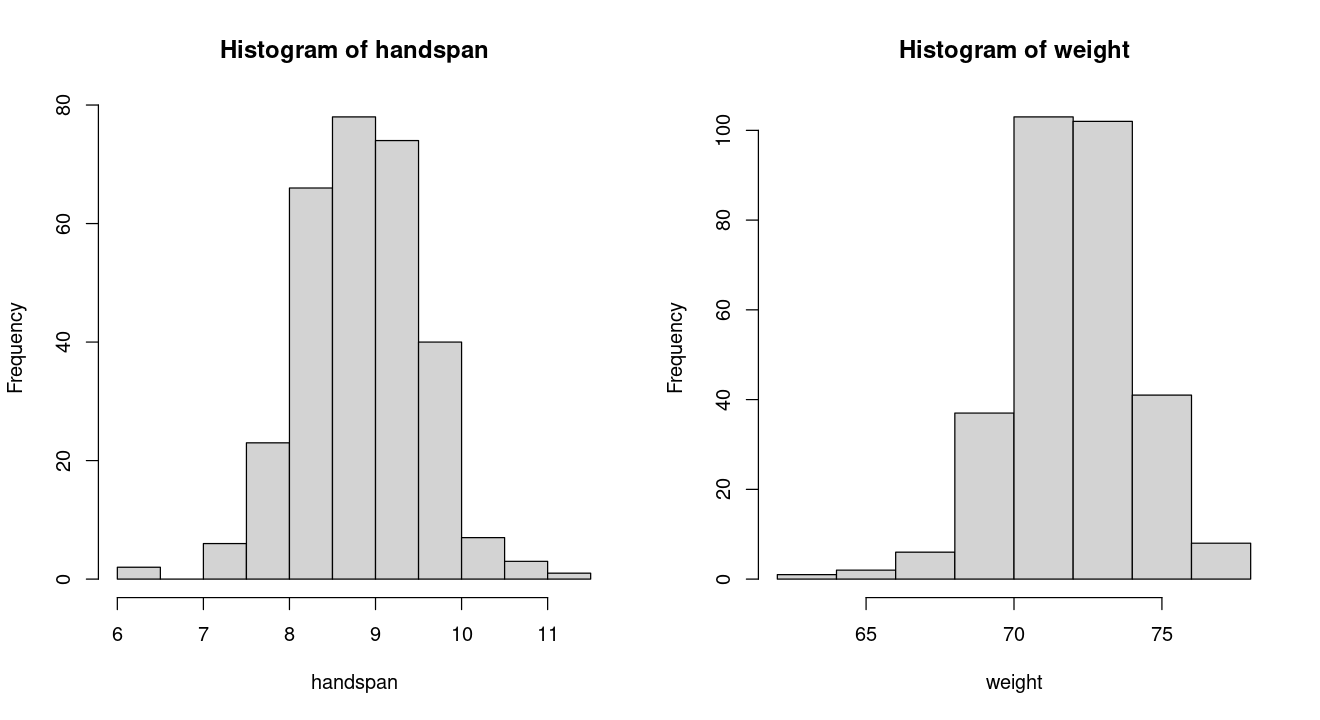

In [60]:
options(repr.plot.width = 11, repr.plot.height = 6)
par(mfrow=c(1,2))
hist(handspan)
hist(weight)

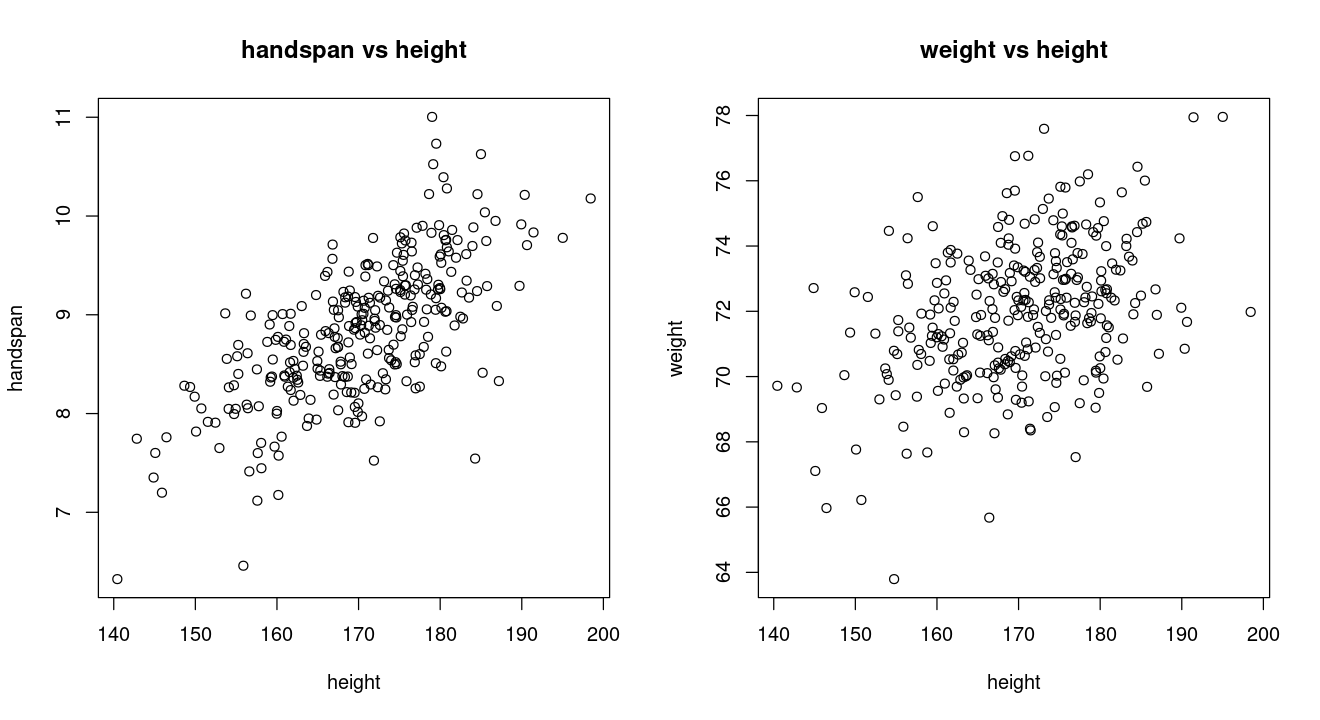

In [61]:
par(mfrow=c(1,2))
plot(height, handspan, main="handspan vs height")
plot(height, weight, main="weight vs height")

In [62]:
# put everything together
hhw_data <- data.table(height, handspan, weight)
head(hhw_data)

height,handspan,weight
<dbl>,<dbl>,<dbl>
160.6903,9.007170,70.91336
161.9983,8.362390,70.53106
151.5334,7.915970,72.43918
174.5868,9.262706,71.27600
170.8506,9.502425,72.34916
166.9435,8.191775,69.97944


In [63]:
# check correlation
hhw_data %>%
    with(cor(height, handspan))

[1] 0.6837421

Now, let's fit with two models:

$$
weight = \beta_0 + \beta_1 \cdot height  + \epsilon; \quad \epsilon \sim N(0, \sigma^2)
$$

and 

$$
weight = \beta_0 + \beta_1 \cdot height + \beta_2 \cdot handspan + \epsilon; \quad \epsilon \sim N(0, \sigma^2)
$$

In [65]:
hhw_reg1 <- lm(weight ~ height, data=hhw_data)
hhw_reg2 <- lm(weight ~ height + handspan, data=hhw_data)
hhw_reg3 <- lm(weight ~ handspan, data=hhw_data)

stargazer(hhw_reg1, hhw_reg2, hhw_reg3, type="text")


                                              Dependent variable:                          
                    -----------------------------------------------------------------------
                                                    weight                                 
                              (1)                     (2)                     (3)          
-------------------------------------------------------------------------------------------
height                     0.083***                0.064***                                
                            (0.011)                 (0.016)                                
                                                                                           
handspan                                            0.409*                 1.020***        
                                                    (0.220)                 (0.164)        
                                                                               

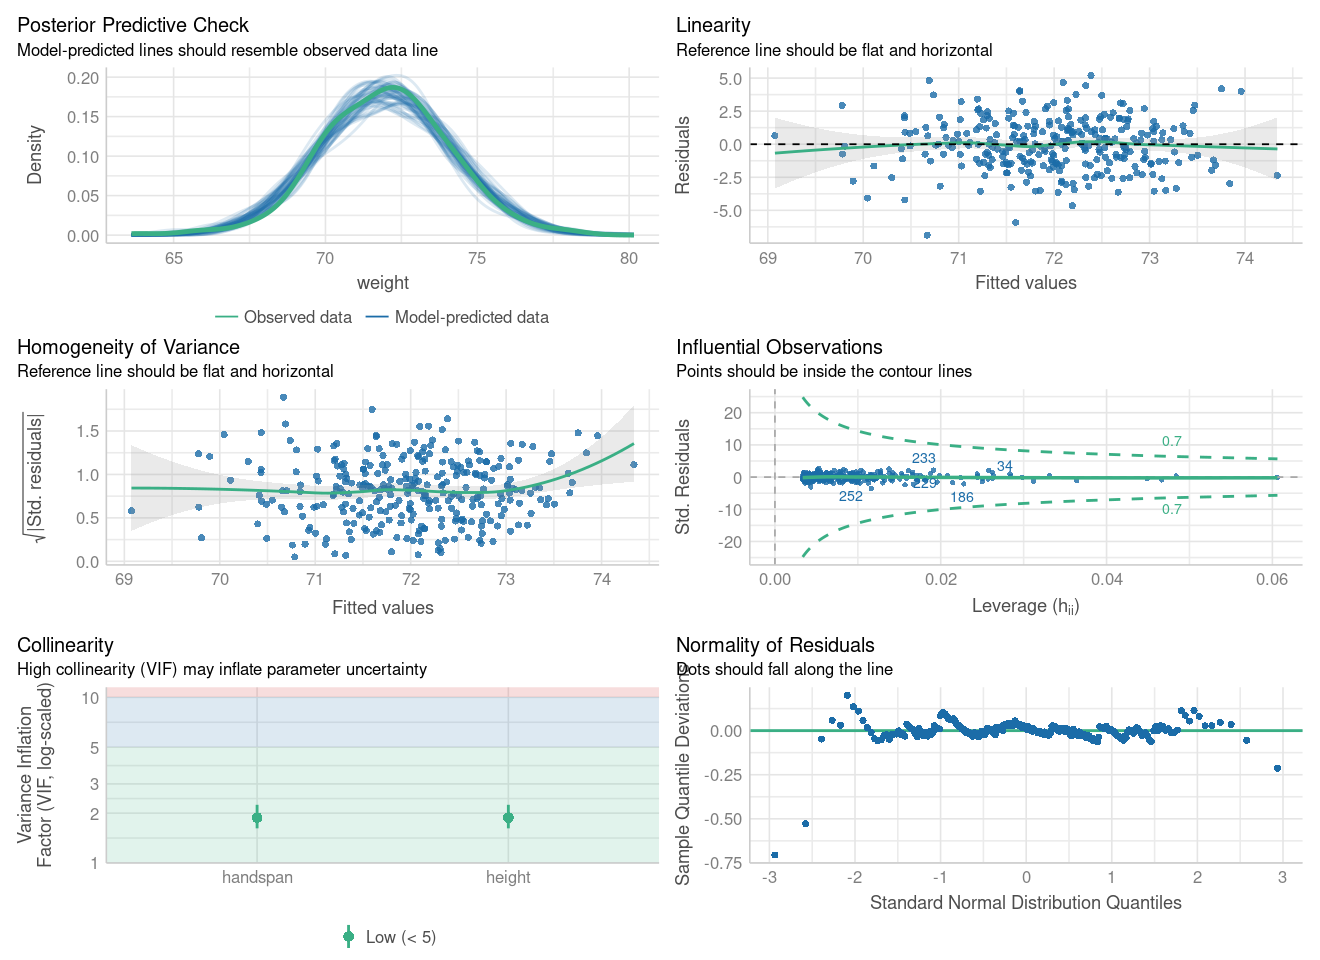

In [68]:
# test for multicollinearity
options(repr.plot.width = 11, repr.plot.height = 8)
check_model(hhw_reg2)

In [72]:
# another example https://stats.idre.ucla.edu/stat/stata/webbooks/reg/elemapi2
elem_data <- fread("../data/elemapi.csv")
head(elem_data)

snum,dnum,api00,api99,growth,meals,ell,yr_rnd,mobility,acs_k3,⋯,not_hsg,hsg,some_col,col_grad,grad_sch,avg_ed,full,emer,enroll,mealcat
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
906,41,693,600,93,67,9,0,11,16,⋯,0,0,0,0,0,NA,76,24,247,2
889,41,570,501,69,92,21,0,33,15,⋯,0,0,0,0,0,NA,79,19,463,3
887,41,546,472,74,97,29,0,36,17,⋯,0,0,0,0,0,NA,68,29,395,3
876,41,571,487,84,90,27,0,27,20,⋯,36,45,9,9,0,1.91,87,11,418,3
888,41,478,425,53,89,30,0,44,18,⋯,50,50,0,0,0,1.50,87,13,520,3
4284,98,858,844,14,NA,3,0,10,20,⋯,1,8,24,36,31,3.89,100,0,343,1


- `api00` : grade API score in 2000
- `acs_k3`: average class size 
- `avg_ed`: average education degree of parents
- `grad_sch`: parent graduation school 
- `col_grad`: parent colledge degree
- `some_col`: parent some college

In [73]:
elem_data %>%
    .[, .(api00, acs_k3, avg_ed, grad_sch, col_grad, some_col)] %>%
    head()

api00,acs_k3,avg_ed,grad_sch,col_grad,some_col
<int>,<int>,<dbl>,<int>,<int>,<int>
693,16,NA,0,0,0
570,15,NA,0,0,0
546,17,NA,0,0,0
571,20,1.91,0,9,9
478,18,1.50,0,0,0
858,20,3.89,31,36,24


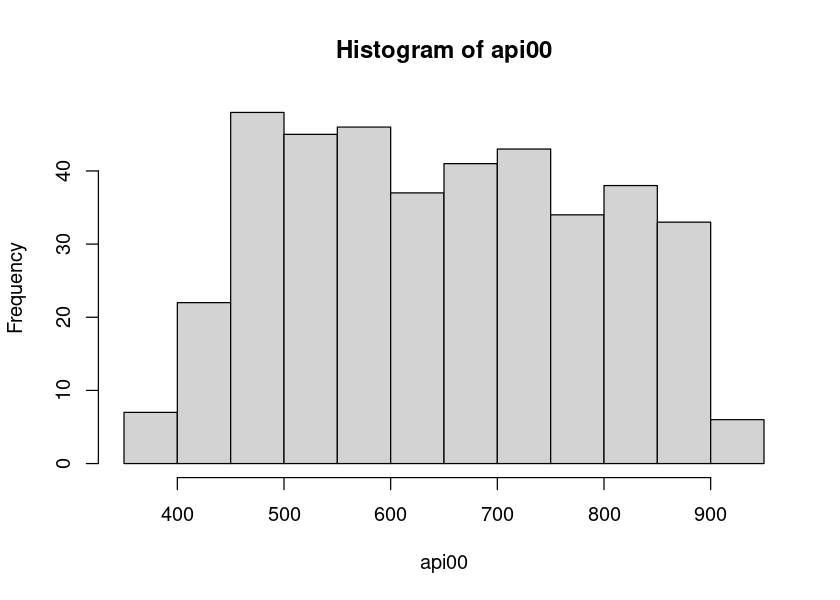

In [76]:
# check distribution
options(repr.plot.width = 7, repr.plot.height = 5)
elem_data %>%
    .[, .(api00, acs_k3, avg_ed, grad_sch, col_grad, some_col)] %>%
    with(hist(api00))

Now I want to exam:

$$
grade_{api00} = \beta_0 + \beta_1 acsK3 + \beta_2 avgEd + \beta_3 gradSch + \beta_4 colGrad + \beta_5 someCol + \epsilon ; \quad \epsilon \sim N(0, \sigma^2)
$$

In [77]:
elem_reg1 <- lm(api00 ~ acs_k3 + avg_ed +  grad_sch + col_grad + some_col, data = elem_data)
stargazer(elem_reg1, type='text')


                        Dependent variable:    
                    ---------------------------
                               api00           
-----------------------------------------------
acs_k3                       -2.361***         
                              (0.852)          
                                               
avg_ed                      227.640***         
                             (37.441)          
                                               
grad_sch                      -1.888           
                              (1.360)          
                                               
col_grad                     -3.085***         
                              (1.024)          
                                               
some_col                      -0.680           
                              (0.815)          
                                               
Constant                    178.510***         
                             (56.747)  

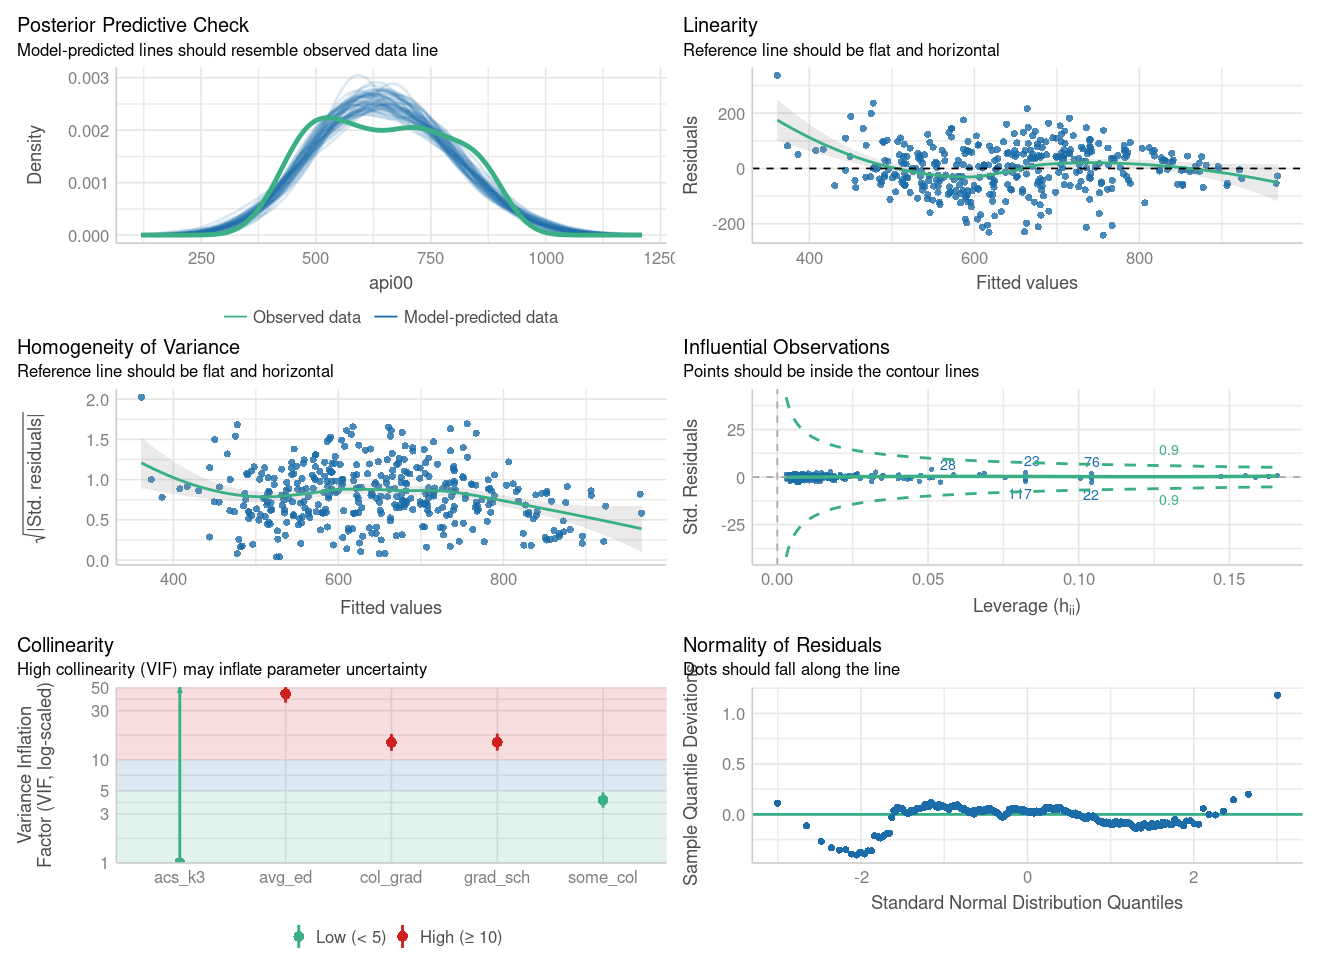

In [78]:
options(repr.plot.width = 11, repr.plot.height = 8)
check_model(elem_reg1)

__Summary__



| Assumptions|Diagnostic check|
|:---------| ---------------|
A1: linear relationship between $y$ and $x$| check via plots |
A2: independence of observations | check via plots |
A3: $E(\epsilon \|x) = 0$ | check via plots |
A4: $Var(\epsilon \|x) = \sigma^2 $ | check via plots|
A5: normal distribution of $\epsilon \sim N(0, \sigma^2)$ | check via plots |
A6: No correlation between $x$ and $\epsilon$ | check via plots |

### High influential points

In [79]:
data("infmrt")
head(infmrt)

,year,infmort,afdcprt,popul,pcinc,physic,afdcper,d90,lpcinc,lphysic,DC,lpopul
,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,1987,8.3,52,1186,13996,173,4.384486,0,9.546527,5.153292,0,7.078341
2,1990,6.2,62,1228,17125,178,5.048860,1,9.748295,5.181784,0,7.113142
3,1987,7.8,11,1056,18083,186,1.041667,0,9.802728,5.225747,0,6.962244
4,1990,7.1,21,1109,21051,200,1.893598,1,9.954703,5.298317,0,7.011214
5,1987,8.5,20,547,14267,244,3.656307,0,9.565704,5.497168,0,6.304449
6,1990,6.4,25,563,17630,253,4.440497,1,9.777357,5.533390,0,6.333280


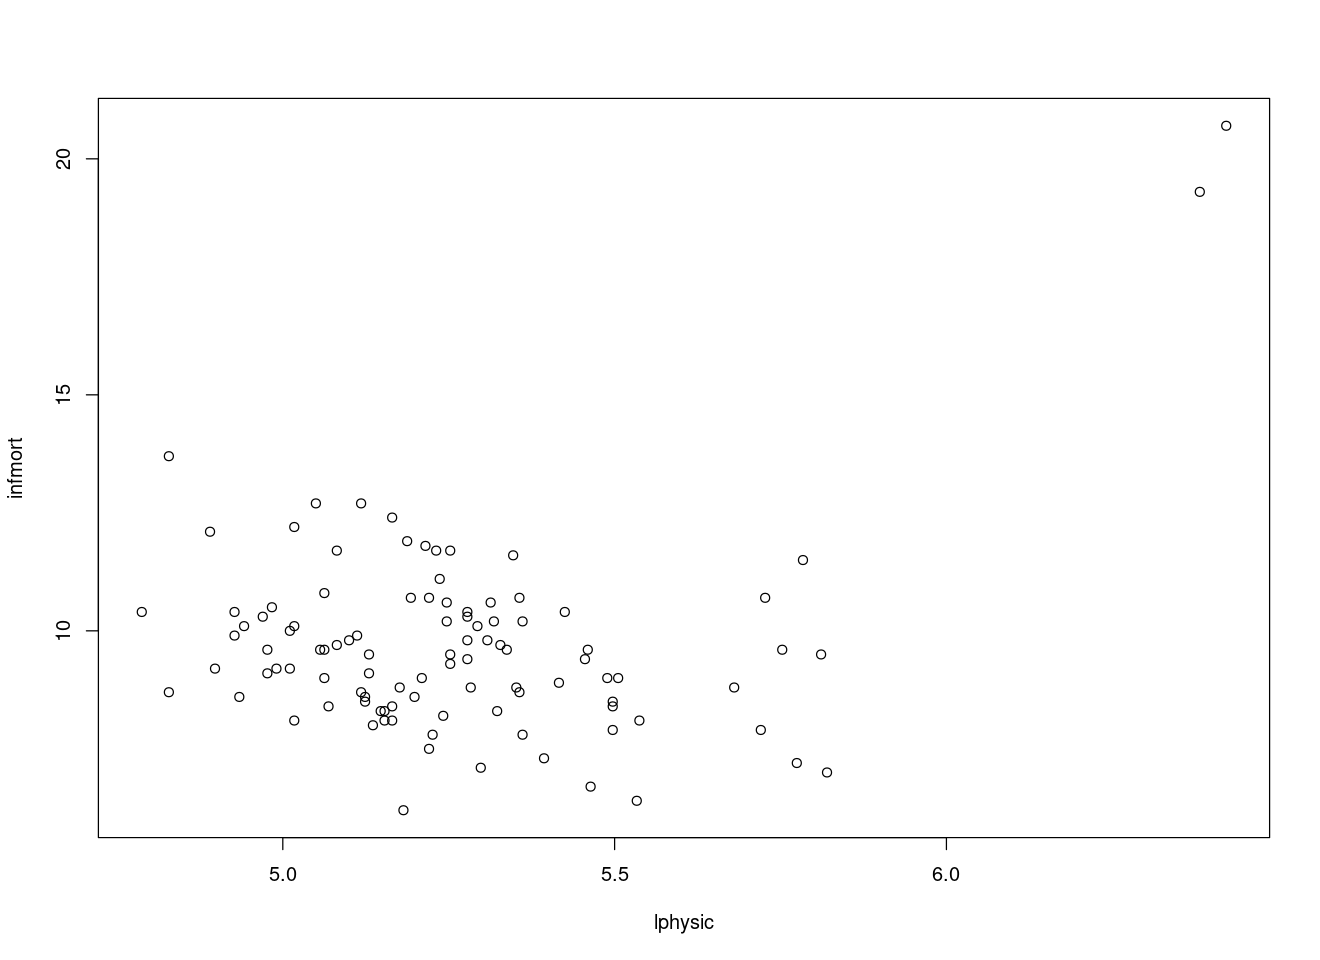

In [81]:
infmrt %>%
    with(plot(lphysic, infmort))

In [82]:
infmrt_reg1 <- lm(infmort ~ lpcinc + lphysic + lpopul, data = infmrt)
stargazer(infmrt_reg1, type="text")


                        Dependent variable:    
                    ---------------------------
                              infmort          
-----------------------------------------------
lpcinc                       -4.884***         
                              (1.293)          
                                               
lphysic                      4.028***          
                              (0.891)          
                                               
lpopul                        -0.054           
                              (0.187)          
                                               
Constant                     36.226***         
                             (10.135)          
                                               
-----------------------------------------------
Observations                    102            
R2                             0.182           
Adjusted R2                    0.157           
Residual Std. Error       1.891 (df = 9

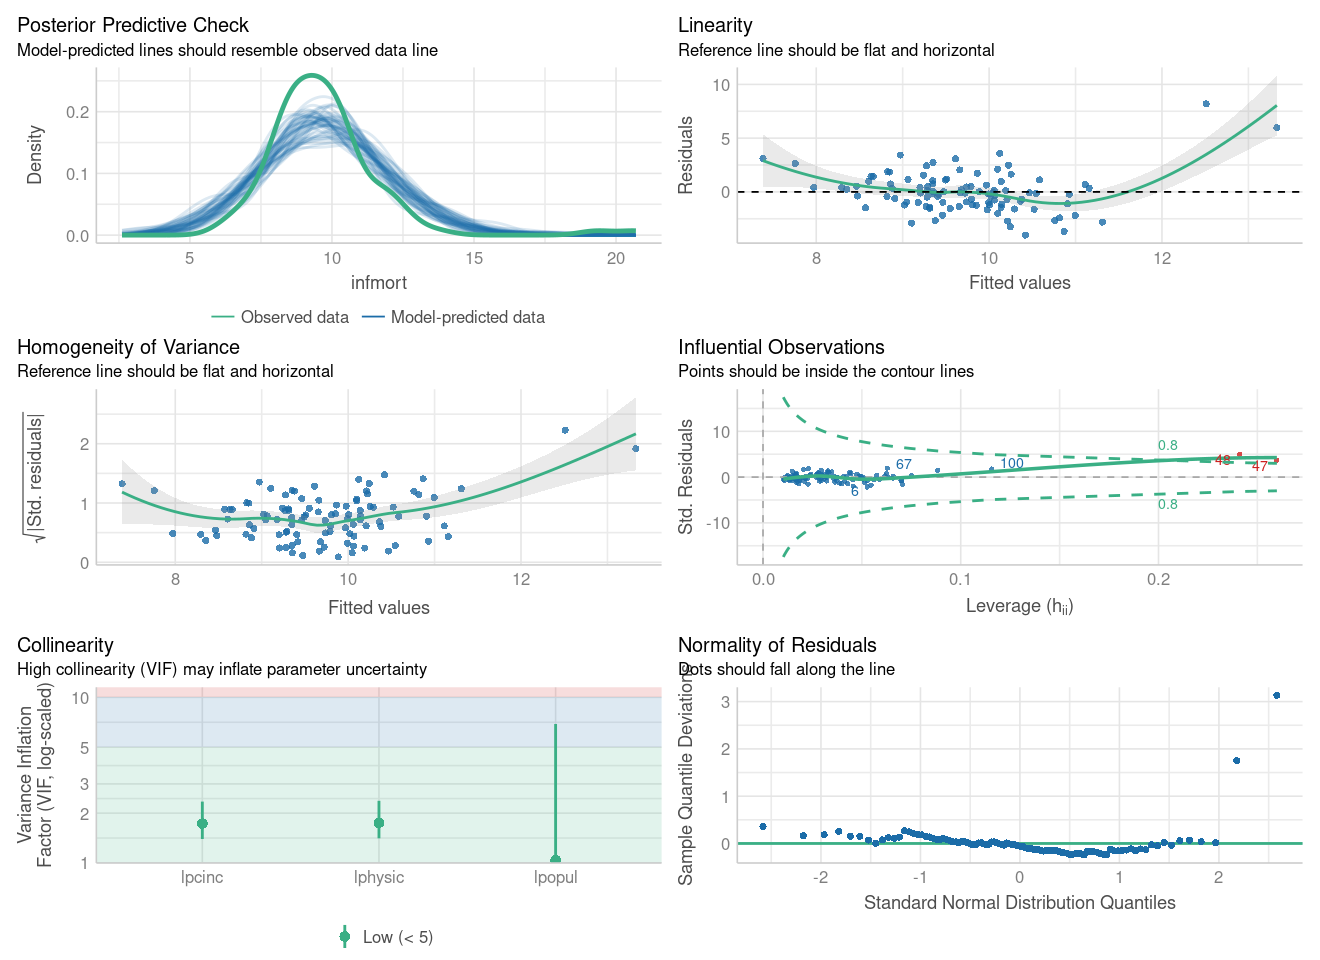

In [83]:
check_model(infmrt_reg1)

In [80]:
infmrt <- as.data.table(infmrt)
infmrt %>%
    .[lphysic <= 6.0] %>%
    .[, .(infmort, lpcinc, lphysic, lpopul)] -> infmrt2 

head(infmrt2)

infmort,lpcinc,lphysic,lpopul
<dbl>,<dbl>,<dbl>,<dbl>
8.3,9.546527,5.153292,7.078341
6.2,9.748295,5.181784,7.113142
7.8,9.802728,5.225747,6.962244
7.1,9.954703,5.298317,7.011214
8.5,9.565704,5.497168,6.304449
6.4,9.777357,5.533390,6.333280


In [84]:
infmrt_reg2 <- lm(infmort ~ lpcinc + lphysic + lpopul, data = infmrt2)
stargazer(infmrt_reg2, type="text")


                        Dependent variable:    
                    ---------------------------
                              infmort          
-----------------------------------------------
lpcinc                       -2.484***         
                              (0.889)          
                                               
lphysic                       -1.516*          
                              (0.773)          
                                               
lpopul                       0.576***          
                              (0.136)          
                                               
Constant                     36.854***         
                              (6.744)          
                                               
-----------------------------------------------
Observations                    100            
R2                             0.286           
Adjusted R2                    0.264           
Residual Std. Error       1.254 (df = 9

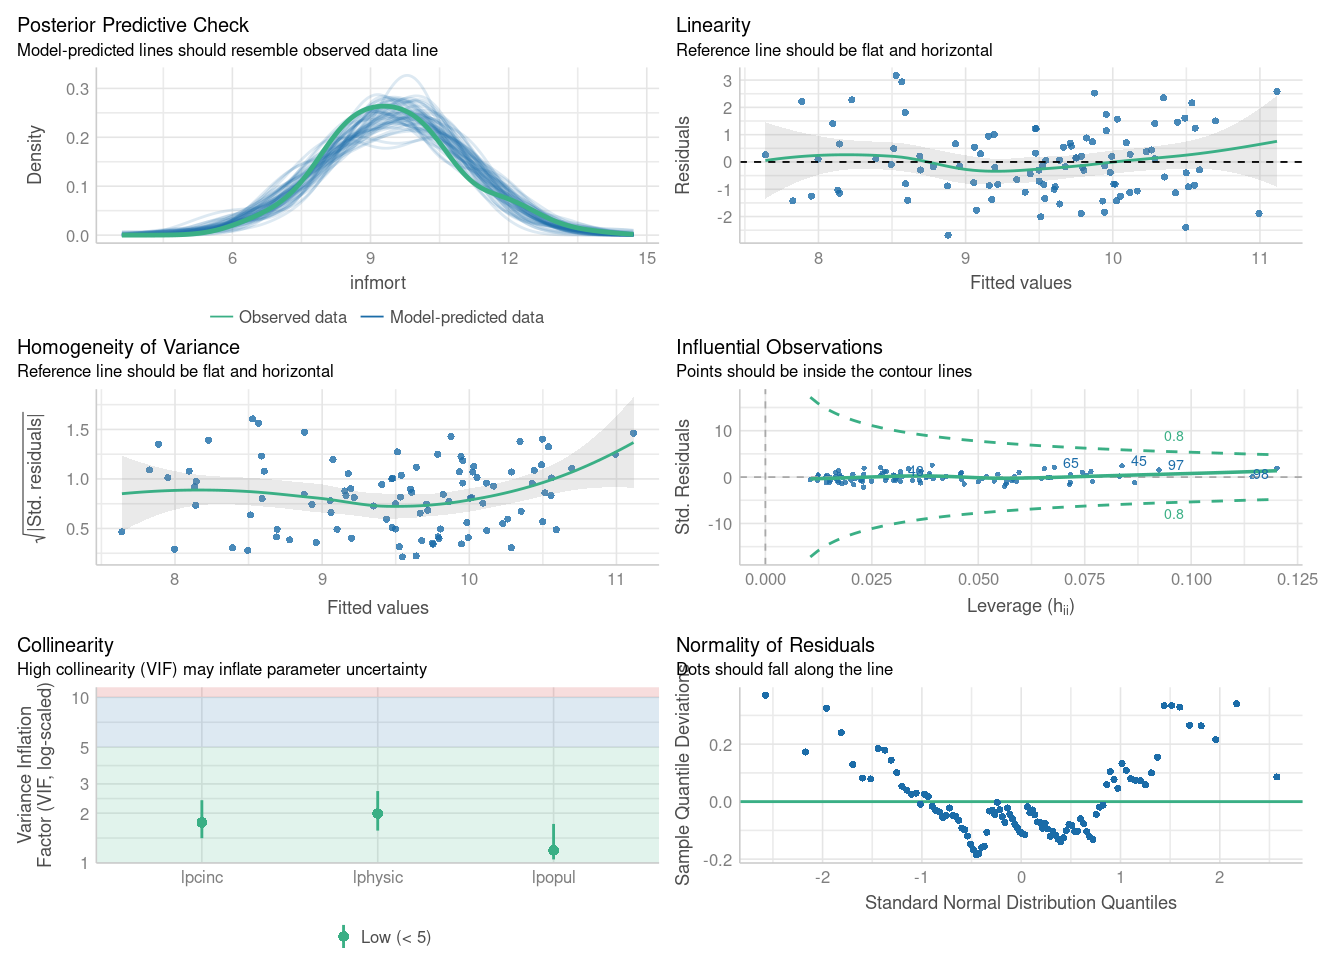

In [85]:
check_model(infmrt_reg2)